# Проект: Исследование стартапов

Автор: Василенко Егор

---
<a class="anchor" id="Введение"></a>

## 1. Введение

### 1.1. Цели и задачи проекта

**1. Ознакомится с данными: загрузка и первичная обработка.** <br>
<pre>1.1. Импортировать библиотеки.<br>
1.2. Загрузить датасеты.<br>
1.3. Проверка и исправление названий столбцов датасетов при необходимости.<br>
1.4. Получить общую информацию о датасетах, предположить шаги для исправления некорректных моментов.<br> 
1.5. Привести данные к корректному типу данных при возможности.<br>
1.6. Провести анализ пропусков в датасетах.</pre>
**2. Предобработка данных и предварительное исследование.**<br>
<pre>2.1. Раунды финансирования по годам: исследовать датасет `company_and_rounds.csv` без предобработке.<br>
2.2. Люди и их образование: `people.csv` и `education.csv`.<br>
2.3. Принять решение об объединении датасетов.<br>
2.4. Провести работу над проблемным датасетом `company_and_rounds.csv`. </pre>
**3. Исследовательский анализ объединенных таблиц.**<br>
<pre>3.1. Провести объединение данных.<br>
3.2. Провести анализ выбросов.<br>
3.3. Исследовать компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.<br>
3.4. Категоризировать цены стартапов.<br>
3.5. Ответить на вопрос - сколько раундов продержится стартап перед покупкой.</pre>
**4. Подвести финальные итоги и дать возможные рекомендации.**<br>

### 1.2. Описание данных

***Основные датасеты***

**Таблица `acquisition`**
Содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

**Таблица `company_and_rounds`**
Содержит информацию о компаниях и раундах финансирования:
- company_id — идентификатор компании.
- name — название компании.
- category_code — категория области деятельности компании.
- status — статус компании.
- founded_at — дата основания компании.
- closed_at — дата закрытия компании (если она все ещё работает, то NaN).
- domain — официальный сайт компании.
- network_username — ник компании в сети.
- country_code — код страны компании.
- investment_rounds — число инвестиционных раундов.
- funding_rounds — число раундов финансирования.
- funding_total — сумма финансирования.
- milestones — вехи финансирования.
- funding_round_id — идентификатор этапа финансирования.
- funded_company_id — идентификатор компании.
- funded_at — дата финансирования.
- funding_round_type — тип финансирования.
- raised_amount — сумма финансирования.
- pre_money_valuation — предварительная денежная оценка.
- participants — число участников.
- is_first_round — является ли раунд первым.
- is_last_round — является раунд последним.

---

Вероятно, таблица изначально была разделена на две, вследствие чего дублируется `company_id`, так что логично разделение на две таблицы `companies` и `rounds`:
- `companies`
  - company_id — идентификатор компании.
  - name — название компании.
  - category_code — категория области деятельности компании.
  - status — статус компании.
  - founded_at — дата основания компании.
  - closed_at — дата закрытия компании (если она все ещё работает, то NaN).
  - domain — официальный сайт компании.
  - network_username — ник компании в сети.
  - country_code — код страны компании.
  - investment_rounds — число инвестиционных раундов.
  - funding_rounds — число раундов финансирования.
  - funding_total — сумма финансирования.
  - milestones — вехи финансирования.
- `rounds`
  - funding_round_id — идентификатор этапа финансирования.
  - funded_company_id — идентификатор компании.
  - funded_at — дата финансирования.
  - funding_round_type — тип финансирования.
  - raised_amount — сумма финансирования.
  - pre_money_valuation — предварительная денежная оценка.
  - participants — число участников.
  - is_first_round — является ли раунд первым.
  - is_last_round — является раунд последним.

---

**Таблица `education`**
Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

**Таблица `people`**
Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

**Таблица `degrees`**
Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.
  
***Дополнительные датасеты***
  
**Таблица `fund`**
Содержит информацию о фондах:
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.

**Таблица `investment`**
Содержит информацию о раундах инвестирования:
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

<a class="anchor" id="Содержание"></a>

### 1.3. Содержимое проекта

- [Введение](#Введение)
- [Импорт библиотек](#Импорт-библиотек)
  - [Загрузка датасетов](#Загрузка-датасетов)
  - [Проверка названий столбцов](#Проверка-названий-столбцов)
  - [Общая информация](#Общая-инфа)
  - [Смена типов данных](#Смена-типов-данных)
  - [Анализ пропусков](#Анализ-пропусков)
  - [Проверка на дубликаты](#Проверка-на-дубликаты)
  - [Промежуточный вывод](#Промежуточный-вывод)
- [Предобработка данных, предварительное исследование](#Предобработка-данных)
  - [Рынок финансирования по годам](#Раунды-финансирования-по-годам)
  - [Люди и их образование](#Люди-и-их-образование)
  - [Объединять или не объединять](#Объединять-или-не-объединять)
  - [Проблемный датасет и причина возникновения пропусков](#Проблемный-датасет-и-причина-возникновения-пропусков)
- [Объединение данных и исследование](#Объединение-данных)
  - [Объединение данных](#Объединение-данных)
  - [Анализ выбросов](#Анализ-выбросов)
  - [Куплены ли стартапы бесплатно](#Куплены-забесплатно)
  - [Цены стартапов по категориям](#Цены-стартапов-по-категориям)
  - [Сколько раундов продержится стартап перед покупкой](#Сколько-раундов-продержится-стартап-перед-покупкой)
- [Итоговый вывод](#Итоговый-вывод)

---
<a class="anchor" id="Знакомство-с-данными"></a>

## 2. Знакомство с данными: загрузка и первичная предобработка

<a class="anchor" id="Импорт-библиотек"></a>

---
### 2.1. Импорт библиотек

In [1]:
# Для работы с данными
import pandas as pd
import numpy as np

# Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib_venn import venn3

# Дополнительно
from IPython.display import display, HTML
import missingno as msno 
import pandas_datareader.data as web
import datetime

In [2]:
# Немного настроек
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

<a class="anchor" id="Загрузка-датасетов"></a>

---
### 2.2. Загрузка датасетов

In [3]:
path = "https://code.s3.yandex.net/datasets/"

acquisition = pd.read_csv(path + 'acquisition.csv')
company_and_rounds = pd.read_csv(path + 'company_and_rounds.csv')
degrees = pd.read_csv(path + 'degrees.csv')
education = pd.read_csv(path + 'education.csv')
fund = pd.read_csv(path + 'fund.csv')
investment = pd.read_csv(path + 'investment.csv')
people = pd.read_csv(path + 'people.csv')

<a class="anchor" id="Проверка-названий-столбцов"></a>

---
### 2.3. Проверка названий столбцов датасетов, их исправление при необходимости

In [4]:
datasets = {
    "acquisition": acquisition,
    "company_and_rounds": company_and_rounds,
    "degrees": degrees,
    "education": education,
    "fund": fund,
    "investment": investment,
    "people": people
}

for name, dataset in datasets.items():
    print(f"Названия столбцов в датасете '{name}':")
    print(dataset.columns)
    print("------------------")

Названия столбцов в датасете 'acquisition':
Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')
------------------
Названия столбцов в датасете 'company_and_rounds':
Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')
------------------
Названия столбцов в датасете 'degrees':
Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')
------------------
Названия столбцов в датасете 'education':
Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')
------------------
Названия столбцов в датасете '

Все столбцы датасетов, за исключение одного датасета `company_and_rounds`, соответствуют стилю snake case. Следует исправить вид в нем:

In [5]:
company_and_rounds.columns = company_and_rounds.columns.str.lower().str.strip().str.replace("  ","_")
company_and_rounds.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Названия столбцов датасета исправлены. Теперь все названия всех датасетов соответстуют стилю snake_case. Присутствует также момент с 2мя столбцами, которые имеют одинаковое название. Обычно такое, наверное, надо было бы уточнять у того, кто давал задание - описание данных не дает полноты по этому моменту. Однако, вероятно, эти столбцы имеют одни и те же данные о id компаний, в которые инвестировали, а датасет `company_and_rounds` в действительности собирает данные двух датасетов, которые было бы логично разделить: датасет с данными о компаниях с уникальным значением по `company_id` и второй датасет, в которым столбцом с уникальными значениями будет `funding_round_id`.

In [6]:
# Список названий столбцов
columns = list(company_and_rounds.columns)

# Находим индекс второго вхождения company_id
company_id_indices = [i for i, col in enumerate(columns) if col == "company_id"]

if len(company_id_indices) > 1:
    second_company_id_index = company_id_indices[1]  # Берем второй индекс
    columns[second_company_id_index] = "funded_company_id"  # Меняем имя столбца

# Обновляем названия столбцов в датасете
company_and_rounds.columns = columns

In [7]:
company_and_rounds.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'funded_company_id', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

<a class="anchor" id="Общая-инфа"></a>

---
### 2.4. Общая информация о датасетах, необходимая для принятия решений о предобработке

#### 2.4.1. Основные датасеты

- `acquisition`

In [8]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [9]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


**Вывод:**
- Всего 9407 строк и 6 столбцов;
- Пропуски присутствуют в столбцах: `term_code` и `acquired_at`;
- Типы данных являются корректными, за исключением разве что столбца `acquired_at`, у которого данные можно привести к типу `datetime`.

---

- `company_and_rounds`

In [10]:
company_and_rounds.iloc[:, :11].head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,0.0
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,0.0


In [11]:
company_and_rounds.iloc[:, 11:].head()

,funding_total,milestones,funding_round_id,funded_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217471 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  funded_company_id    52928 non-null   float64
 15  funded_at        

In [13]:
company_and_rounds['raised_amount'].unique()

array([ 5250000.,  9500000., 25000000., ...,   250122.,  1859390.,
       10633300.])

**Вывод:**
- Всего 217774 строк и 22 столбца;
- Пропуски присутствуют во столбцах, кроме `company_id`, `status`, `investment_rounds`, `funding_rounds`, `funding_total` и `milestones`;
- Типы данных некорректны в столбцах:
    - `is_first_round` и `is_last_round` стоит привести либо к целочисленному типу, либо к булевому;
    - `participants`, `company_id`, `investment_rounds`, `funding_rounds`, `funding_round_id`, `milestones`, `participants`  к целочисленному типу;
    - `founded_at`, `closed_at`, `funded_at` можно привести у типу `datetime`.

---

**Дополнительное исследование по `company_id` и `funded_company_id`**

Посмотрю на совпадение столбцов `company_id` и `funded_company_id` без пропусков хотя бы по одному. Если они полностью совпадают, то один можно заполнить другим.

In [14]:
filtered_df = company_and_rounds.dropna(subset=['company_id', 'funded_company_id']).copy()
filtered_df.loc[:, 'is_equal'] = filtered_df['company_id'] == filtered_df['funded_company_id']

In [15]:
filtered_df.shape[0]

52626

In [16]:
filtered_df['is_equal'].count()

np.int64(52626)

In [17]:
filtered_df.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,funding_round_id,funded_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,is_equal
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0,True
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0,True
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0,True
15,1001.0,FriendFeed,web,acquired,2007-10-01,NaN,friendfeed.com,friendfeed,USA,0.0,...,1644.0,1001.0,2008-02-26,series-a,5000000.0,0.0,3.0,1.0,1.0,True
20,10014.0,Mobclix,mobile,acquired,2008-03-01,NaN,mobclix.com,mobclix,USA,0.0,...,6682.0,10014.0,2008-09-01,angel,0.0,0.0,1.0,1.0,1.0,True


Совпадений построчных 52626, при этом датафрейм без пропусков хотя бы по одному из столбцов `company_id` и `funded_company_id` состоит всего из 52626 строк, то есть полное совпадение. Отсюда можно сделать вывод о том, что это действительно столбцы со значениями, которые означают одно и то же, поэтому значениями из одного можно заменить пропуски в другом. Учту это в будущем при обработке пропусков.


---

- `people`

In [18]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [19]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


**Вывод:**
- Всего 226709 строк и 5 столбцов;
- Пропуски присутствуют в всехстолбцах, кроме `id`;
- Тип данных столбца `company_id` надо привести к целочисленному.

---

- `education`

In [20]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [21]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


**Вывод:**
- Всего 109610 строк и 4 столбца;
- Пропуски присутствуют в столбцах: `instituition` и `graduated_at`;
- Тип данных столбца `graduated_at` можно привести к типу данных `date`.

---

- `degrees`

In [22]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [23]:
degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


**Вывод:**
- Всего 109610 строк и 4 столбца;
- Пропуски присутствуют в столбцах: `degree_type` и `subject`;
- Типы данных корректны.

---

#### 2.4.2. Дополнительные датасеты

- `fund`

In [24]:
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [25]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


**Вывод:**
- Всего 11652 строк и 9 столбцов;
- Пропуски присутствуют в столбцах `name`, `founded_at`, `domain`, `network_username` и `country_code`;
- Типы данных корректны, но столбец `founded_at` можно привести к типу данных `date`.

---

- `investment`

In [26]:
investment.head()

,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [27]:
investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


**Вывод:**
- Всего 61403 строк и 4 столбца;
- Пропуски отсутствуют;
- Типы данных корректны.

<a class="anchor" id="Смена-типов-данных"></a>

---
### 2.5. Смена типов данных

- `acquisition`

In [28]:
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at']).dt.normalize()

In [29]:
acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


- `company_and_rounds`

In [30]:
columns_car = ['founded_at', 'closed_at', 'funded_at']

for col in columns_car:
    company_and_rounds[col] = pd.to_datetime(company_and_rounds[col]).dt.normalize()

- `education`

In [31]:
education['graduated_at'] = pd.to_datetime(education['graduated_at']).dt.normalize()

- `fund`

In [32]:
fund['founded_at'] = pd.to_datetime(fund['founded_at']).dt.normalize()

<a class="anchor" id="Анализ-пропусков"></a>

---
### 2.6. Анализ пропусков

#### 2.6.1. Основные датасеты

- `company_and_rounds`

In [33]:
company_and_rounds.shape[0]

217774

In [34]:
company_and_rounds.iloc[:, :11].head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0


In [35]:
company_and_rounds.iloc[:, 11:].head()

,funding_total,milestones,funding_round_id,funded_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': company_and_rounds.isna().sum(),
    'Percentage NaN': company_and_rounds.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
company_id,302,0.14%
name,303,0.14%
category_code,73888,33.93%
status,302,0.14%
founded_at,107818,49.51%
closed_at,214325,98.42%
domain,70615,32.43%
network_username,122240,56.13%
country_code,109167,50.13%
investment_rounds,302,0.14%


In [37]:
company_and_rounds.iloc[:, :11].head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0
3,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0
4,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0


In [38]:
company_and_rounds.iloc[:, 11:].head()

,funding_total,milestones,funding_round_id,funded_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


**Вывод:** <br>
- В данных датасета `company_and_rounds` присутствует множество пропусков, причем в каждом из его столбцов;
- Логичная обработка пропусков затруднена, хотя, например, можно проверить, нет ли id компаний, у которых есть названия, и наоборот, заполнив таким образом пропуски;
- Таким же образом можно поступить и с другими столбцами, но нужны дополнительные исследования;
- Часть можно заменить на индикатор -1. Например, даты, которые очень сложно, если вообще возможно, восстановить.

---

- `acquisition`

In [39]:
acquisition.shape[0]

9407

In [40]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': acquisition.isna().sum(),
    'Percentage NaN': acquisition.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
id,0,0.00%
acquiring_company_id,0,0.00%
acquired_company_id,0,0.00%
term_code,7576,80.54%
price_amount,0,0.00%
acquired_at,29,0.31%


In [41]:
acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


**Вывод:**<br>
- Пропуски по столбцу `term_code` можно заполнить, создав отдельную категорию или заменив на индикатор.
- В столбце `acquired_at` пропуски либо можно просто оставить, либо удалить эти строки, ибо они составляют лишь малую часть от общего числа.

---

- `people`

In [42]:
people.shape[0]

226709

In [43]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': people.isna().sum(),
    'Percentage NaN': people.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
id,0,0.00%
first_name,9,0.00%
last_name,4,0.00%
company_id,192094,84.73%
network_username,187842,82.86%


In [44]:
people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


**Вывод:**<br>
- Имя можно заполнить, если присутствует фамилия, но для этого потребуется либо ручное заполнение, либо парсинг;
- То же самое можно сделать, если присутствуют данные в столбце `network_username`;
- Данные в столбце `company_id` можно найти лишь через махинации с другими столбцами и последующее сравнение с данными из интернета.
- В целом, основным вариантом является либо парсинг данных, либо удаление с пропусками в столбцах `first_name` и `last_name` и заменой на индикатор -1 / создание отдельной категории.

---

- `education`

In [45]:
education.shape[0]

109610

In [46]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': education.isna().sum(),
    'Percentage NaN': education.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
id,0,0.00%
person_id,0,0.00%
instituition,55,0.05%
graduated_at,51556,47.04%


In [47]:
education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaT


**Вывод:**<br>
- Не представляю вариантов логической замены пропусков, особенно если это касается столбца `graduated_at`;
- В столбце институтов можно создать отдельную категорию.

---

- `degrees`

In [48]:
degrees.shape[0]

109610

In [49]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': degrees.isna().sum(),
    'Percentage NaN': degrees.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
id,0,0.00%
object_id,0,0.00%
degree_type,11221,10.24%
subject,28312,25.83%


In [50]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


**Вывод:**<br>
- Логически абсолютно правильных вариантов заполнения пропусков нет;
- Можно попробовать через связи таблиц, а дальше через ещё какие-либо махинации.

---

#### 2.6.2. Дополнительные датасеты

- `fund`

In [51]:
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaT,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaT,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaT,NaN,NaN,NaN,0,0,1


In [52]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': fund.isna().sum(),
    'Percentage NaN': fund.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
id,0,0.00%
name,3,0.03%
founded_at,7047,60.48%
domain,4290,36.82%
network_username,9503,81.56%
country_code,4599,39.47%
investment_rounds,0,0.00%
invested_companies,0,0.00%
milestones,0,0.00%


**Вывод:**<br>
- Пропуски можно заменить лишь через связи с другими датасетами;
- Другими вариантами являются тот же сбор данных через интернет, либо удаление с пропусками по столбцу `name` и заменой на индикатор или создание категории.

---

- `investment`

In [53]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': investment.isna().sum(),
    'Percentage NaN': investment.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
id,0,0.00%
funding_round_id,0,0.00%
company_id,0,0.00%
fund_id,0,0.00%


**Вывод:**<br>
- Пропуски отсутствуют.

<a class="anchor" id="Проверка-на-дубликаты"></a>

---
### 2.8. Проверка на дубликаты: явные и неявные

**Явные дубликаты**

In [54]:
for name, dataset in datasets.items():
    print(f" Число явных дубликатов в датасете '{name}': {dataset.duplicated().sum()}")
    print("------------------")

 Число явных дубликатов в датасете 'acquisition': 0
------------------
 Число явных дубликатов в датасете 'company_and_rounds': 0
------------------
 Число явных дубликатов в датасете 'degrees': 0
------------------
 Число явных дубликатов в датасете 'education': 0
------------------
 Число явных дубликатов в датасете 'fund': 0
------------------
 Число явных дубликатов в датасете 'investment': 0
------------------
 Число явных дубликатов в датасете 'people': 0
------------------


**Неявные дубликаты**

In [55]:
for name, dataset in datasets.items():
    print(f"Проверка неявных дубликатов в датасете '{name}'")
    
    # Определяем категориальные столбцы
    categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_columns:
        # Приводим текст к нижнему регистру и убираем лишние пробелы
        normalized_values = dataset[col].astype(str).str.lower().str.strip()
        
        # Проверяем количество уникальных значений до и после нормализации
        unique_before = dataset[col].nunique()
        unique_after = normalized_values.nunique()
        
        if unique_before > unique_after:
            duplicates_count = unique_before - unique_after
            print(f"В колонке '{col}' найдено {duplicates_count} неявных дубликатов!")
            
            # Создаем таблицу для анализа
            duplicate_mapping = pd.DataFrame({
                'original_value': dataset[col],
                'normalized_value': normalized_values
            })

            # Группируем по нормализованному значению и оставляем те группы, где больше 1 уникального оригинала
            grouped = (duplicate_mapping.groupby('normalized_value')['original_value'].unique().reset_index())

            # Фильтруем, оставляя только те строки, где несколько разных оригинальных значений
            possible_duplicates = grouped[grouped['original_value'].apply(len) > 1]
            
            # Если нашли неявные дубликаты, показываем их
            if not possible_duplicates.empty:
                print(f"Возможные дубликаты в колонке '{col}':")
                display(possible_duplicates)
    print("------------------")

Проверка неявных дубликатов в датасете 'acquisition'
------------------
Проверка неявных дубликатов в датасете 'company_and_rounds'
В колонке 'name' найдено 1 неявных дубликатов!
Возможные дубликаты в колонке 'name':


,normalized_value,original_value
46604,dietparty,"[DietParty, dietParty]"
122088,oliver exterminating co.,"[Oliver Exterminating Co., Oliver Exterminatin..."


В колонке 'network_username' найдено 196 неявных дубликатов!
Возможные дубликаты в колонке 'network_username':


,normalized_value,original_value
527,3pillarglobal,"[3PillarGlobal, 3pillarglobal]"
1661,actiancorp,"[actiancorp, ActianCorp]"
1753,actonsoftware,"[actonsoftware, ActOnSoftware]"
2407,aerifymedia,"[AerifyMedia, aerifymedia]"
2921,aitthemes,"[aitthemes, AitThemes]"
...,...,...
78257,youbeauty,"[youbeauty, YouBeauty]"
78485,yp,"[yp, YP]"
78869,zepinvest,"[ZepInvest, zepinvest]"
78889,zerodesktop,"[zerodesktop, ZeroDesktop]"


------------------
Проверка неявных дубликатов в датасете 'degrees'
В колонке 'degree_type' найдено 403 неявных дубликатов!
Возможные дубликаты в колонке 'degree_type':


,normalized_value,original_value
51,2.1 ba hons,"[2.1 Ba Hons, 2.1 BA Hons]"
107,a levels,"[A levels, A Levels]"
110,a-levels,"[A-levels, A-Levels]"
122,a.b. honors,"[A.B. honors, A.B. Honors]"
123,a.b. magna cum laude,"[A.B. Magna Cum Laude, A.B. magna cum laude]"
...,...,...
6665,undergraduate degree,"[Undergraduate degree, Undergraduate Degree, u..."
6669,undergraduate studies,"[Undergraduate studies, Undergraduate Studies]"
6678,university degree,"[University degree, University Degree]"
6686,unknown,"[unknown, Unknown]"


В колонке 'subject' найдено 867 неявных дубликатов!
Возможные дубликаты в колонке 'subject':


,normalized_value,original_value
88,a levels,"[A Levels, A levels]"
123,accountancy,"[Accountancy, accountancy, ACCOUNTANCY]"
146,accounting,"[Accounting, accounting, ACCOUNTING]"
183,accounting and auditing,"[accounting and auditing, Accounting and Audit..."
185,accounting and business administration,"[Accounting and Business Administration, accou..."
...,...,...
19040,wealth management,"[Wealth management, Wealth Management]"
19049,web design,"[Web Design, web design]"
19064,web development,"[Web Development, WEB DEVELOPMENT, Web develop..."
19078,web technologies,"[Web Technologies, Web technologies]"


------------------
Проверка неявных дубликатов в датасете 'education'
В колонке 'instituition' найдено 535 неявных дубликатов!
Возможные дубликаты в колонке 'instituition':


,normalized_value,original_value
136,academy of art,"[Academy of Art, Academy Of Art]"
283,albany high school,"[Albany High School, Albany high school]"
394,american intercontinental university,"[American Intercontinental University, America..."
519,anna university,"[Anna University, anna university, Anna univer..."
533,ansal institute of technology,"[Ansal Institute of technology, Ansal Institut..."
...,...,...
20256,wits university,"[Wits University, WITS University]"
20379,yale school of management,"[Yale School of Management, YALE School of Man..."
20382,yale university,"[Yale University, yale university, Yale univer..."
20385,yale university school of medicine,"[Yale University School of Medicine, Yale Univ..."


------------------
Проверка неявных дубликатов в датасете 'fund'
В колонке 'network_username' найдено 6 неявных дубликатов!
Возможные дубликаты в колонке 'network_username':


,normalized_value,original_value
124,annarborspark,"[AnnArborSPARK, annarborspark]"
178,austinventures,"[AustinVentures, austinventures]"
524,dfjvc,"[dfjvc, DFJvc]"
1291,nab,"[NAB, nab]"
1326,newfund,"[Newfund, newfund]"
1447,palcapital,"[palcapital, PALcapital]"
1784,startupminds,"[StartupMinds, startupminds]"


------------------
Проверка неявных дубликатов в датасете 'investment'
------------------
Проверка неявных дубликатов в датасете 'people'
В колонке 'first_name' найдено 1703 неявных дубликатов!
Возможные дубликаты в колонке 'first_name':


,normalized_value,original_value
47,a,"[A, a]"
89,aamir,"[Aamir, AAMIR]"
106,aarni,"[Aarni, AARNI]"
108,aaron,"[Aaron, aaron, AARON]"
141,abbie,"[Abbie, abbie]"
...,...,...
26558,zia,"[Zia, zia]"
26588,ziv,"[Ziv, ziv]"
26609,zohar,"[zohar, Zohar]"
26616,zoran,"[Zoran, zoran]"


В колонке 'last_name' найдено 2231 неявных дубликатов!
Возможные дубликаты в колонке 'last_name':


,normalized_value,original_value
239,.com,"[.com, .COM]"
525,a. day,"[A. DAY, A. Day]"
822,a. macdonald,"[A. MacDonald, A. Macdonald]"
1216,a. wright,"[A. WRIGHT, A. Wright]"
1342,abbasi,"[Abbasi, abbasi]"
...,...,...
104852,zhou,"[Zhou, zhou]"
104854,zhu,"[Zhu, zhu]"
104895,zickel,"[Zickel, zickel]"
104963,zilli,"[Zilli, zilli]"


В колонке 'network_username' найдено 36 неявных дубликатов!
Возможные дубликаты в колонке 'network_username':


,normalized_value,original_value
348,aaron,"[aaron, Aaron]"
870,adnxtc,"[adnxtc, ADNxtc]"
1459,alex_castro__,"[Alex_Castro__, alex_castro__]"
2162,andersfunglq,"[AndersfungLQ, andersfunglq]"
2995,arjanharing,"[ArjanHaring, arjanharing]"
5982,caramelcooks,"[CaramelCooks, caramelCooks]"
6494,charlieardagh,"[CharlieArdagh, charlieardagh]"
7816,cruxbite,"[CruxBite, cruxbite]"
8260,danielomcguire,"[danielomcguire, DanielOMcGuire]"
10855,eisenberg,"[eisenberg, Eisenberg]"


------------------


**Обработаю эти дубликаты**

In [56]:
for name, dataset in datasets.items(): 
    # Определяем категориальные столбцы
    categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_columns:
        # Приводим текст к нижнему регистру и убираем лишние пробелы
        dataset[col] = dataset[col].astype(str).str.lower().str.strip()

In [57]:
for name, dataset in datasets.items(): 
    # Определяем категориальные столбцы
    categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_columns:
        # Приводим текст к нижнему регистру и убираем лишние пробелы
        print(f"Уникальные значения в датасете {name}")
        display(dataset[col].unique())
        print("---------------------")

Уникальные значения в датасете acquisition


array(['nan', 'cash', 'stock', 'cash_and_stock'], dtype=object)

---------------------
Уникальные значения в датасете company_and_rounds


array(['wetpaint', 'flektor', 'there', ..., 'flowgram', 'pphotonet',
       'photonet'], dtype=object)

---------------------
Уникальные значения в датасете company_and_rounds


array(['web', 'games_video', 'network_hosting', 'advertising',
       'cleantech', 'nan', 'enterprise', 'other', 'consulting', 'mobile',
       'health', 'software', 'analytics', 'finance', 'education',
       'medical', 'manufacturing', 'biotech', 'ecommerce',
       'public_relations', 'hardware', 'search', 'news', 'government',
       'security', 'photo_video', 'travel', 'semiconductor', 'social',
       'legal', 'transportation', 'hospitality', 'sports', 'nonprofit',
       'fashion', 'messaging', 'music', 'automotive', 'design',
       'real_estate', 'local', 'nanotech', 'pets'], dtype=object)

---------------------
Уникальные значения в датасете company_and_rounds


array(['operating', 'acquired', 'closed', 'ipo', 'nan'], dtype=object)

---------------------
Уникальные значения в датасете company_and_rounds


array(['wetpaint-inc.com', 'flektor.com', 'there.com', ...,
       'flowgram.com', 'pphotonet.co', 'photonet.com'], dtype=object)

---------------------
Уникальные значения в датасете company_and_rounds


array(['bachelrwetpaint', 'nan', 'hostnine', ..., 'networkzend',
       'pphotonet', 'photonet'], dtype=object)

---------------------
Уникальные значения в датасете company_and_rounds


array(['usa', 'nan', 'mar', 'ind', 'aus', 'fra', 'jpn', 'nld', 'egy',
       'isr', 'gbr', 'tha', 'can', 'aut', 'irl', 'swe', 'deu', 'bra',
       'fin', 'rus', 'sgp', 'mex', 'chn', 'esp', 'isl', 'kor', 'tur',
       'dnk', 'arg', 'pak', 'hun', 'pol', 'grc', 'prt', 'blr', 'css',
       'mkd', 'che', 'svn', 'ukr', 'ita', 'nzl', 'lie', 'nor', 'cze',
       'vnm', 'hrv', 'ben', 'chl', 'gha', 'zaf', 'mys', 'est', 'bel',
       'svk', 'twn', 'cri', 'hkg', 'bgd', 'bol', 'lbn', 'lux', 'aze',
       'col', 'phl', 'are', 'idn', 'rom', 'ant', 'cym', 'nga', 'gin',
       'cyp', 'lka', 'swz', 'vgb', 'mlt', 'sau', 'ken', 'bgr', 'per',
       'lva', 'lao', 'npl', 'mda', 'cmr', 'uga', 'tun', 'ury', 'mus',
       'ven', 'omn', 'ecu', 'kwt', 'jor', 'ltu', 'alb', 'qat', 'umi',
       'pst', 'reu', 'gtm', 'pcn', 'bhs', 'geo', 'bwa', 'dza', 'grd',
       'zmb', 'gib', 'pan', 'mtq', 'pri', 'bih', 'dma', 'bhr', 'syc',
       'sle', 'tto', 'vct', 'ara', 'brb', 'nam', 'slv', 'afg', 'blz',
       'uzb', 'irn',

---------------------
Уникальные значения в датасете company_and_rounds


array(['series-a', 'series-b', 'series-c+', 'nan', 'angel', 'venture',
       'other', 'private-equity', 'post-ipo', 'crowdfunding'],
      dtype=object)

---------------------
Уникальные значения в датасете degrees


array(['p:6117', 'p:6136', 'p:6005', ..., 'p:268589', 'p:268527',
       'p:268528'], dtype=object)

---------------------
Уникальные значения в датасете degrees


array(['mba', 'ba', 'ms', ..., 'masters in applied finance',
       'master of public health', "master's of music"], dtype=object)

---------------------
Уникальные значения в датасете degrees


array(['nan', 'english, french', 'mass communication', ...,
       'executive senior management program',
       "bachelor's of music, composition, studio production",
       'business/managerial economics - political science'], dtype=object)

---------------------
Уникальные значения в датасете education


array(['nan', 'washington university, st. louis', 'boston university',
       ..., 'auburn university, auburn, alabama',
       'loyola university, new orleans, louisiana',
       'rutgers university, newark, new jersey'], dtype=object)

---------------------
Уникальные значения в датасете fund


array(['nan', 'greylock partners', 'mission ventures', ..., 'calstrs',
       'haystack', 'fbfund'], dtype=object)

---------------------
Уникальные значения в датасете fund


array(['nan', 'greylock.com', 'missionventures.com', ..., 'calstrs.com',
       'network.com::haystack_fund',
       'developers.socialnet.com::fbfund.php'], dtype=object)

---------------------
Уникальные значения в датасете fund


array(['nan', 'greylockvc', 'imi_vc', ..., 'calstrs', 'haystack_fund',
       'fbfund'], dtype=object)

---------------------
Уникальные значения в датасете fund


array(['nan', 'usa', 'fra', 'isr', 'rus', 'che', 'can', 'sgp', 'ind',
       'bra', 'jpn', 'sau', 'chn', 'bgr', 'ita', 'esp', 'deu', 'hkg',
       'gbr', 'cyp', 'aus', 'irl', 'are', 'zaf', 'nld', 'tur', 'kor',
       'prt', 'mus', 'pol', 'egy', 'twn', 'nzl', 'ltu', 'phl', 'aut',
       'lbn', 'cym', 'kwt', 'ken', 'bel', 'chl', 'col', 'tto', 'rom',
       'bmu', 'est', 'bhr', 'syc', 'alb', 'lka', 'nor', 'khm', 'swe',
       'fin', 'hun', 'lux', 'per', 'dnk', 'bgd', 'tha', 'mys', 'mex',
       'gib', 'nga', 'gha', 'arg', 'vnm', 'mkd', 'qat', 'kgz', 'grc',
       'svn', 'hrv', 'jor', 'pak', 'isl', 'pri', 'fji', 'ukr', 'blr',
       'ven', 'ury', 'pst', 'svk', 'lva', 'bhs', 'idn', 'cze', 'brb',
       'mar', 'npl', 'pan', 'mlt', 'wsm', 'css', 'aze'], dtype=object)

---------------------
Уникальные значения в датасете people


array(['mark', 'peter', 'dr. steven', ..., 'ã\x89lie', 'tanis', 'dr. ray'],
      dtype=object)

---------------------
Уникальные значения в датасете people


array(['zuckerberg', 'lester', 'e. saunders', ..., 'manda', 'gench',
       'tamberrino'], dtype=object)

---------------------
Уникальные значения в датасете people


array(['nan', 'jobsbostontech', 'fbroulette', ..., 'itechsocialnet',
       'socialnethubs', 'esocialnetlike'], dtype=object)

---------------------


Я обнаружил интересный момент некоторые пропуски по столбцам прочитались как строка `nan`, а не пропуск. И такое есть в каждом столбце `company_and_rounds`, а ещё такое есть и в `fund`. Так что надо это исправлять.

In [58]:
for name, dataset in datasets.items(): 
    dataset.replace("nan", np.nan, inplace=True)

Теперь можно сказать, что были исправлены все дубликаты, которые можно исправить автоматизированно. Остаются только возможные ошибки в записи данных: опечатка или что-то подобное. Однако, их в обнаружено не было, хотя и не исключаю, что что-то могло быть пропущено.

<a class="anchor" id="Промежуточный-вывод"></a>

---
### 2.9. Промежуточный вывод

- Пропуски присутствуют во всех таблицах, за исключением `investment` - идеи для их заполнения можно увидеть вернувшись непосредственно к пунктам про пропуски в каждом из датасетов.
- По возможности типы данных изменены на более корректные, за исключением тех случаев, когда это не позволяют пропуски, в таких случая оставлен тип данных `float`. В последующем при возможности они будут приведены либо к `int`, либо к `bool`.
- Явных дубликатов не было, неявные дубликаты были обработаны.

***Итоговая общая информация по всем датасетам:***
- **Основные датасеты:**
  - `acquisition`
    - Всего 9407 строк и 6 столбцов;
    - Пропуски присутствуют в столбцах: `term_code` и `acquired_at`;
    - Типы данных являются корректными, за исключением разве что столбца `acquired_at`, у которого данные можно привести к типу `datetime`.
  - `company_and_rounds`
    - Всего 217774 строк и 22 столбца;
    - Пропуски присутствуют во столбцах, кроме `company_id`, `status`, `investment_rounds`, `funding_rounds`, `funding_total` и `milestones`;
    - Типы данных некорректны в столбцах:
      - `is_first_round` и `is_last_round` стоит привести либо к целочисленному типу, либо к булевому;
      - `participants`, `company_id`, `investment_rounds`, `funding_rounds`, `funding_round_id`, `milestones`, `participants`  к целочисленному типу;
      - `founded_at`, `closed_at`, `funded_at` можно привести у типу `datetime`.
  - `education`
    - Всего 226709 строк и 5 столбцов;
    - Пропуски присутствуют в всех столбцах, кроме `id`;
    - Тип данных столбца `company_id` надо привести к целочисленному.
  - `people`
    - Всего 109610 строк и 4 столбца;
    - Пропуски присутствуют в столбцах: `instituition` и `graduated_at`;
    - Тип данных столбца `graduated_at` можно привести к типу данных `date`.
  - `degrees`
    - Всего 109610 строк и 4 столбца;
    - Пропуски присутствуют в столбцах: `degree_type` и `subject`;
    - Типы данных корректны.
- **Дополнительные:**
  - `fund`
    - Всего 11652 строк и 9 столбцов;
    - Пропуски присутствуют в столбцах `name`, `founded_at`, `domain`, `network_username` и `country_code`;
    - Типы данных корректны, но столбец `founded_at` можно привести к типу данных `date`.
  - `investment`
    - Всего 61403 строк и 4 столбца;
    - Пропуски отсутствуют;
    - Типы данных корректны.


[Вернуться к содержанию](#Содержание)

---
<a class="anchor" id="Предобработка-данных"></a>
## 3. Предобработка данных, предварительное исследование

<a class="anchor" id="Раунды-финансирования-по-годам"></a>

---
### 3.1. Раунды финансирования по годам

Выполню задание в соответствии с условием, по которому его необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

In [59]:
company_and_rounds.head(1)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,funded_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0


#### 3.1.1. Составление сводной таблицы по годам на основании `raised_amount`

Для каждого года указан:
- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год.

In [60]:
funding_pivot = company_and_rounds.pivot_table(index = company_and_rounds['funded_at'].dt.year,
                               values='raised_amount',
                               aggfunc=['median', 'count']).reset_index()

funding_pivot.columns = ['year', 'median_raised_amount', 'total_rounds']

In [61]:
funding_pivot = funding_pivot[funding_pivot['total_rounds'] > 50].reset_index()

In [62]:
funding_pivot.drop(columns=['index'], inplace=True)

In [63]:
funding_pivot

,year,median_raised_amount,total_rounds
0,1999.0,2000000.0,76
1,2000.0,4200000.0,125
2,2001.0,3000000.0,96
3,2002.0,4200000.0,116
4,2003.0,3000000.0,159
5,2004.0,5000000.0,291
6,2005.0,5500000.0,1633
7,2006.0,5000000.0,2436
8,2007.0,3973320.0,3279
9,2008.0,3110000.0,3774


#### 3.1.2. Построение графика, отражающего динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования

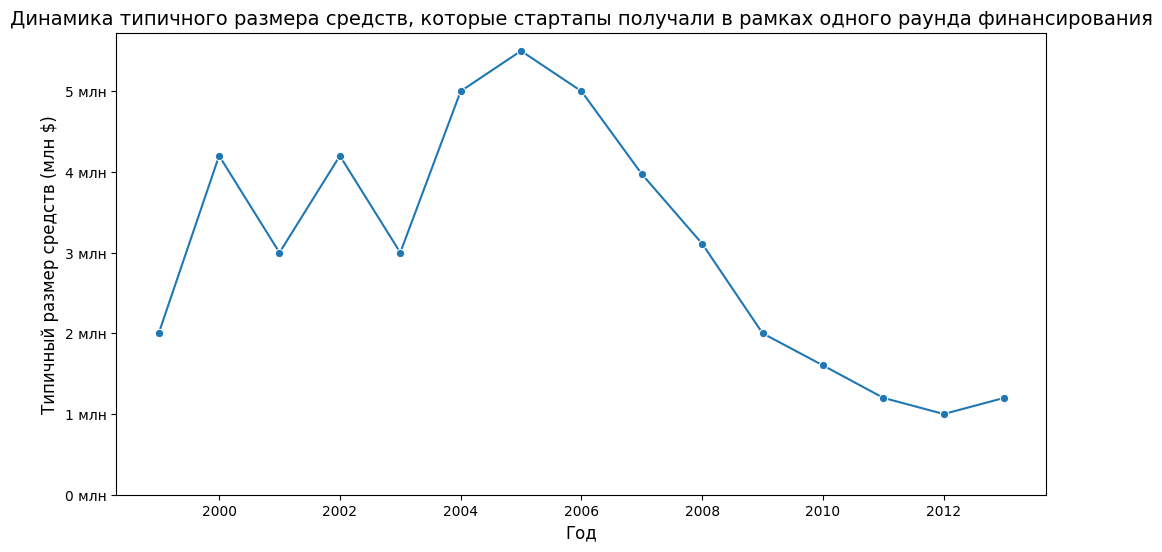

In [64]:
plt.figure(figsize=(12, 6))

# Рисуем график
ax = sns.lineplot(data=funding_pivot, x='year', y='median_raised_amount', marker='o')

# Подписываем оси
ax.set_xlabel("Год", fontsize=12)
ax.set_ylabel("Типичный размер средств (млн $)", fontsize=12)
ax.set_title("Динамика типичного размера средств, которые стартапы получали в рамках одного раунда финансирования", fontsize=14)

# Изменяем единицы измерения оси Y на миллионы
ax.set_yticks(np.arange(0, funding_pivot['median_raised_amount'].max(), 1_000_000))  # Шаг 1 млн
ax.set_yticklabels([f"{int(y/1_000_000)} млн" for y in np.arange(0, funding_pivot['median_raised_amount'].max(), 1_000_000)])

plt.show()

**Вывод:** <br>
График показывает динамику медианного размера финансирования стартапов в рамках одного раунда. В период с 1999 по 2006 год наблюдается устойчивый рост, достигая пика в 2005-2006 годах, когда средний размер раунда превышает 5 миллионов долларов. Однако после 2006 года начинается резкий спад, и к 2012 году медианное финансирование снижается до менее 1 миллиона долларов. Вероятной причиной этого снижения является глобальный финансовый кризис 2008 года, который привел к снижению венчурных инвестиций и повышенной осторожности инвесторов (или как вариант, меньшее количество данных за этот перод, что искажает и результаты). В 2012 году наблюдается небольшое восстановление, что может свидетельствовать о начале стабилизации рынка. График отражает цикличность венчурного финансирования: периоды роста сменяются снижением, вызванным экономическими факторами, с последующим постепенным восстановлением.

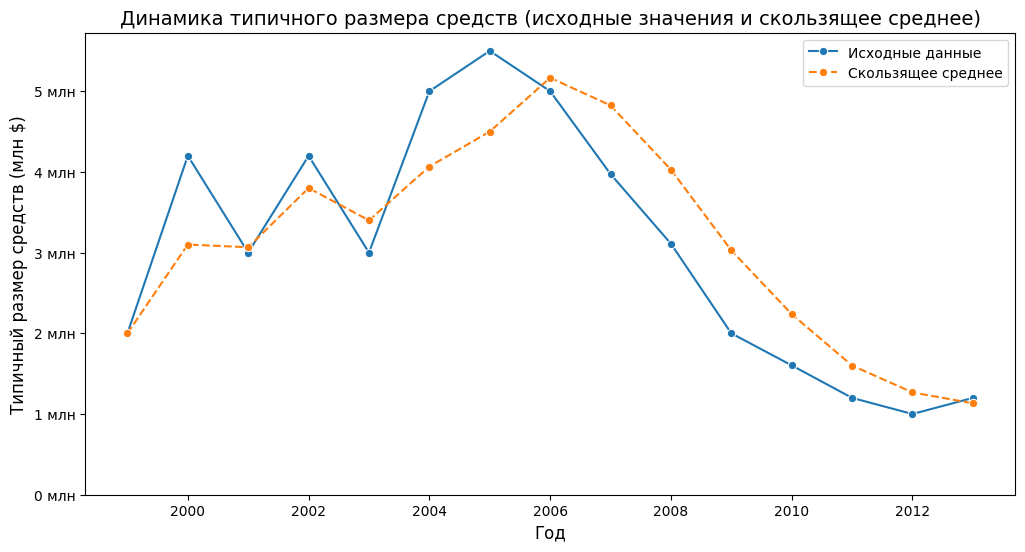

In [65]:
plt.figure(figsize=(12, 6))

# Добавляем скользящее среднее для сглаживания тренда
funding_pivot["smoothed"] = funding_pivot["median_raised_amount"].rolling(window=3, min_periods=1).mean()

# Рисуем график
ax = sns.lineplot(data=funding_pivot, x="year", y="median_raised_amount", marker="o", label="Исходные данные")
sns.lineplot(data=funding_pivot, x="year", y="smoothed", marker="o", linestyle="--", label="Скользящее среднее")

# Корректируем единицы измерения оси Y (в миллионах)
ax.set_yticks(np.arange(0, funding_pivot["median_raised_amount"].max(), 1000000))
ax.set_yticklabels([f"{int(y/1_000_000)} млн" for y in np.arange(0, funding_pivot["median_raised_amount"].max(), 1_000_000)])

# Подписываем оси
ax.set_xlabel("Год", fontsize=12)
ax.set_ylabel("Типичный размер средств (млн $)", fontsize=12)
ax.set_title("Динамика типичного размера средств (исходные значения и скользящее среднее)", fontsize=14)

# Легенда
ax.legend()

plt.show()

**Вывод:** <br>
- Динамика медианного размера привлечённых средств подтверждает предыдущие наблюдения: с 1999 по 2006 год наблюдается рост, затем следует резкий спад. Скользящее среднее помогает сгладить колебания и показать общую тенденцию. Оно подтверждает, что пик финансирования пришёлся на 2005-2006 годы, после чего началось устойчивое снижение, достигшее минимума к 2012 году.
  
- Использование скользящего среднего позволяет лучше увидеть закономерности и тренды, устраняя влияние краткосрочных флуктуаций (естественные колебания данных, которые могут происходить из-за случайных факторов или сезонных изменений). Основные выводы остаются неизменными: рост финансирования до 2006 года, затем спад, вероятно связанный с глобальным финансовым кризисом 2008 года, и небольшие признаки восстановления в 2012 году.

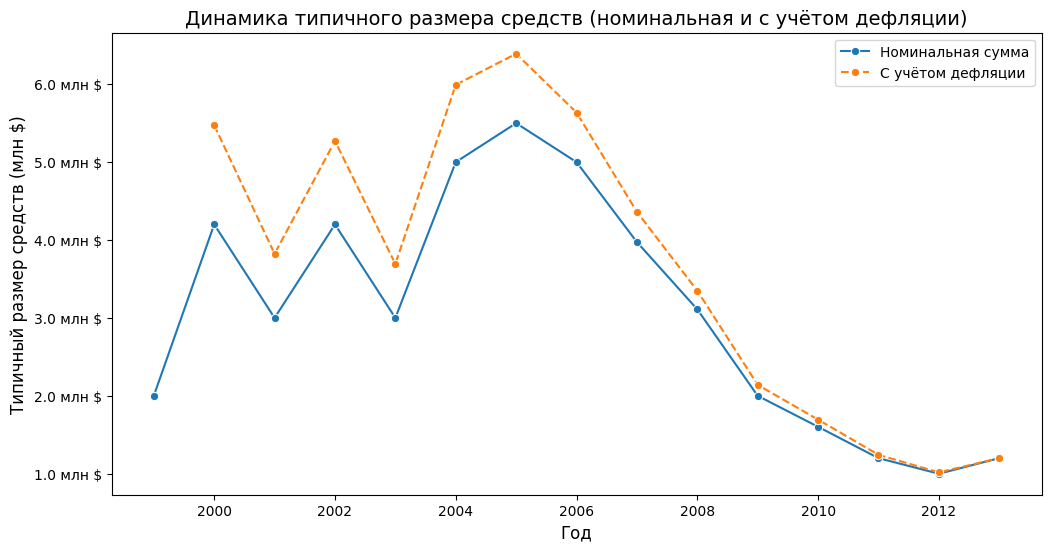

In [66]:
# Определяем временной диапазон
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2013, 12, 31)

# Загружаем GDP Deflator с помощью pandas-datareader
gdp_deflator = web.DataReader("GDPDEF", "fred", start, end)
gdp_deflator = gdp_deflator.resample("YE").mean()  # Среднегодовое значение
gdp_deflator.index = gdp_deflator.index.year

# Приводим к относительным значениям
gdp_deflator = gdp_deflator / gdp_deflator.max()

# Добавляем в `funding_pivot`
funding_pivot["deflator"] = funding_pivot["year"].map(gdp_deflator["GDPDEF"])
funding_pivot["adjusted_funding"] = funding_pivot["median_raised_amount"] / funding_pivot["deflator"]

# Создаем фигуру и ось для графика
plt.figure(figsize=(12, 6))
ax = plt.gca()  # получаем текущую ось

# Строим линии графиков
sns.lineplot(data=funding_pivot, x="year", y="median_raised_amount",
             marker="o", label="Номинальная сумма", ax=ax)
sns.lineplot(data=funding_pivot, x="year", y="adjusted_funding",
             marker="o", linestyle="--", label="С учётом дефляции", ax=ax)

# Функция для форматирования меток оси Y в миллионах долларов
def millions_formatter(x, pos):
    # Делим значение на 1000000 и форматируем с одним знаком после запятой
    return f'{x/1e6:,.1f} млн $'

# Применяем форматтер для оси Y
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Подписываем оси и задаем заголовок
ax.set_xlabel("Год", fontsize=12)
ax.set_ylabel("Типичный размер средств (млн $)", fontsize=12)
ax.set_title("Динамика типичного размера средств (номинальная и с учётом дефляции)", fontsize=14)

# Добавляем легенду
ax.legend()

plt.show()

**Вывод:** <br>
- График демонстрирует динамику медианного размера привлечённых инвестиций стартапами в рамках одного раунда как в номинальных значениях, так и с учётом дефляции.
- В первые годы (1999–2006) наблюдается устойчивый рост финансирования, достигающий пика в 2005–2006 годах. Однако с 2007 года начинается резкое снижение, которое продолжается вплоть до 2012 года.
- Если рассматривать данные с учётом дефляции, то реальный размер инвестиций в пиковые годы оказывается ещё выше, чем в номинальном выражении, что подчёркивает высокую покупательную способность привлечённых средств в тот период.
- После 2008 года разница между номинальными и скорректированными значениями становится менее заметной, что свидетельствует либо о снижении инфляции, либо о более медленном росте венчурного рынка. К 2012–2013 годам медианный размер финансирования стабилизируется на уровне около 1-1,2 млн долларов, что значительно ниже показателей 2005 года даже с учётом инфляции.
- В целом, график подтверждает наличие экономических циклов в венчурном финансировании: периоды роста сменяются резким спадом, а затем возможным восстановлением.

**Итоговая таблица со всеми данными:**

In [67]:
funding_pivot['median_raised_amount'] = funding_pivot['median_raised_amount'].apply(lambda x: f"{x/1_000_000:.1f} млн $" if pd.notna(x) else "—")
funding_pivot['adjusted_funding'] = funding_pivot['adjusted_funding'].apply(lambda x: f"{x/1_000_000:.1f} млн $" if pd.notna(x) else "—")
funding_pivot['smoothed'] = funding_pivot['smoothed'].apply(lambda x: f"{x/1_000_000:.1f} млн $" if pd.notna(x) else "—")
funding_pivot['deflator'] = funding_pivot['deflator'].apply(lambda x: f"{x*100:.1f}%" if pd.notna(x) else "—")


funding_pivot

,year,median_raised_amount,total_rounds,smoothed,deflator,adjusted_funding
0,1999.0,2.0 млн $,76,2.0 млн $,—,—
1,2000.0,4.2 млн $,125,3.1 млн $,76.7%,5.5 млн $
2,2001.0,3.0 млн $,96,3.1 млн $,78.5%,3.8 млн $
3,2002.0,4.2 млн $,116,3.8 млн $,79.7%,5.3 млн $
4,2003.0,3.0 млн $,159,3.4 млн $,81.3%,3.7 млн $
5,2004.0,5.0 млн $,291,4.1 млн $,83.4%,6.0 млн $
6,2005.0,5.5 млн $,1633,4.5 млн $,86.1%,6.4 млн $
7,2006.0,5.0 млн $,2436,5.2 млн $,88.7%,5.6 млн $
8,2007.0,4.0 млн $,3279,4.8 млн $,91.1%,4.4 млн $
9,2008.0,3.1 млн $,3774,4.0 млн $,92.9%,3.3 млн $


**Проверка наличия 2013 года и его целостности**

In [68]:
# Создаём пустой датафрейм
df = pd.DataFrame()

# Извлекаем год и месяц
df['year'] = company_and_rounds['founded_at'].dt.year
df['month'] = company_and_rounds['founded_at'].dt.month

# Получаем уникальные годы и месяцы по этим годам
year_months = df.groupby('year')['month'].unique().reset_index()

# Получаем месяцы для 2013 года
months_2013 = year_months.loc[year_months['year'] == 2013, 'month'].values[0]

# Убеждаемся, что это список и сортируем
sorted_months_2013 = sorted(months_2013.astype(int))

sorted_months_2013

[np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10),
 np.int64(11),
 np.int64(12)]

Отсюда можно понять, что за 2013 год мы имеем данные по всем месяцам.

**Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?**

In [69]:
df = company_and_rounds.copy()

# Оставляем только те строки, у которых год финансирования равен 2013
df_2013 = df[df['funded_at'].dt.year == 2013].copy()

# Добавляем столбец month (месяц), чтобы увидеть динамику по месяцам:
df_2013['month'] = df_2013['funded_at'].dt.month

agg_2013 = (df_2013.groupby('month').agg(rounds_count=('funding_round_id', 'nunique'), total_raised=('raised_amount', 'sum'), avg_raised=('raised_amount', 'mean')).reset_index())

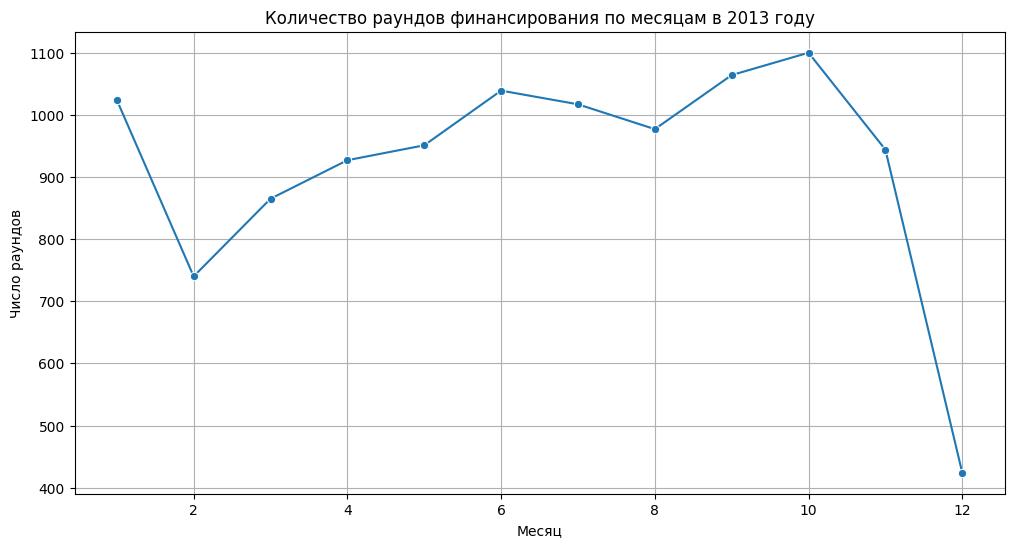

In [70]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=agg_2013, x='month', y='rounds_count', marker='o')

ax.set_title("Количество раундов финансирования по месяцам в 2013 году")
ax.set_xlabel("Месяц")
ax.set_ylabel("Число раундов")
ax.grid(True)

plt.show()

**Вывод:**
- На графике наблюдается спад количества раундов финансирования во втором месяце, после чего следует постепенный рост с колебаниями. 
- Максимальное число раундов приходится на октябрь, затем происходит заметное снижение, особенно в декабре, что может быть связано с сезонными факторами или ситуацией на рынке в тот период (возможен также и недостаток данных по этому месяцу).

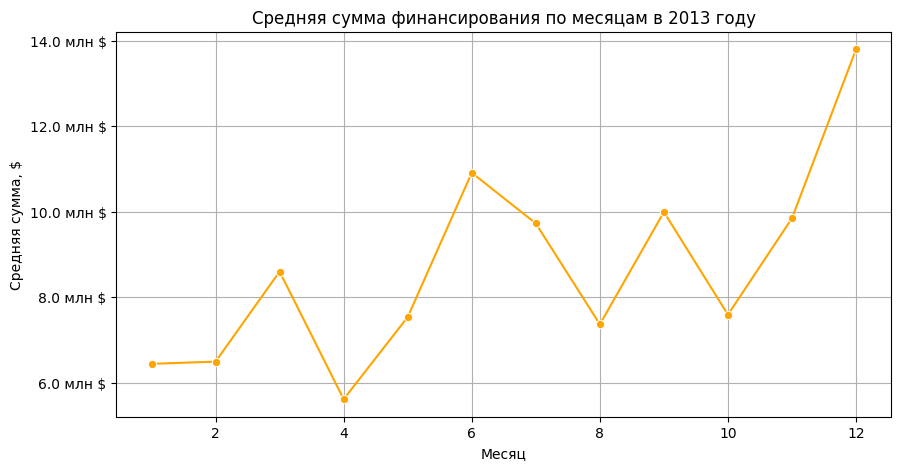

In [71]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=agg_2013, x='month', y='avg_raised', marker='o', color='orange')

# Форматирование оси Y в миллионах долларов
def millions_formatter(x, pos):
    return f'{x/1_000_000:.1f} млн $'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax.set_title("Средняя сумма финансирования по месяцам в 2013 году")
ax.set_xlabel("Месяц")
ax.set_ylabel("Средняя сумма, $")
ax.grid(True)

plt.show()

**Вывод:**
- Средняя сумма финансирования колеблется в течение года, с резким падением в апреле и последующим ростом. 
- Максимальные значения наблюдаются в июне и декабре, что может свидетельствовать о повышенной инвестиционной активности в эти периоды.

In [72]:
agg_2013['total_raised'] = agg_2013['total_raised'].apply(lambda x: f"{x/1_000_000_000:.1f} млрд $" if pd.notna(x) else "—")
agg_2013['avg_raised'] = agg_2013['avg_raised'].apply(lambda x: f"{x/1_000_000:.1f} млн $" if pd.notna(x) else "—")

agg_2013

,month,rounds_count,total_raised,avg_raised
0,1,1024,6.6 млрд $,6.4 млн $
1,2,740,4.8 млрд $,6.5 млн $
2,3,865,7.4 млрд $,8.6 млн $
3,4,927,5.2 млрд $,5.6 млн $
4,5,951,7.2 млрд $,7.5 млн $
5,6,1039,11.3 млрд $,10.9 млн $
6,7,1017,9.9 млрд $,9.7 млн $
7,8,977,7.2 млрд $,7.4 млн $
8,9,1064,10.6 млрд $,10.0 млн $
9,10,1100,8.3 млрд $,7.6 млн $


**Общий вывод**
- В 2013 году наблюдалась разнонаправленная динамика количества раундов финансирования и средней суммы, выделяемой в каждом раунде. 
- Количество раундов финансирования достигало максимума в начале года и осенью, но к концу года резко сокращалось, особенно в декабре. В то же время средняя сумма инвестиций в рамках одного раунда демонстрировала значительные колебания, с минимальными значениями в апреле и максимальными в декабре. 
- Эти данные могут указывать на сезонные колебания активности инвесторов: в начале и осенью происходит наибольшее количество сделок, но в конце года инвесторы склонны выделять более крупные суммы, несмотря на общее снижение числа раундов.

**Дополнительный углублённый анализ**

In [73]:
# Предположим, у вас есть DataFrame company_and_rounds:
df = company_and_rounds.copy()

# Создаём столбец для года
df['year'] = df['funded_at'].dt.year

# Группируем по году и вычисляем три основных показателя:
agg_data = (
    df
    .groupby('year')
    .agg(
        rounds_count=('funding_round_id', 'nunique'),  # x: Число уникальных раундов
        total_raised=('raised_amount', 'sum'),         # z: Общая сумма инвестиций
        avg_raised=('raised_amount', 'mean')           # y: Средний чек
    )
    .reset_index()
)

# Добавим столбец теоретической оценки
agg_data['theoretical_value'] = agg_data['rounds_count'] * agg_data['avg_raised']

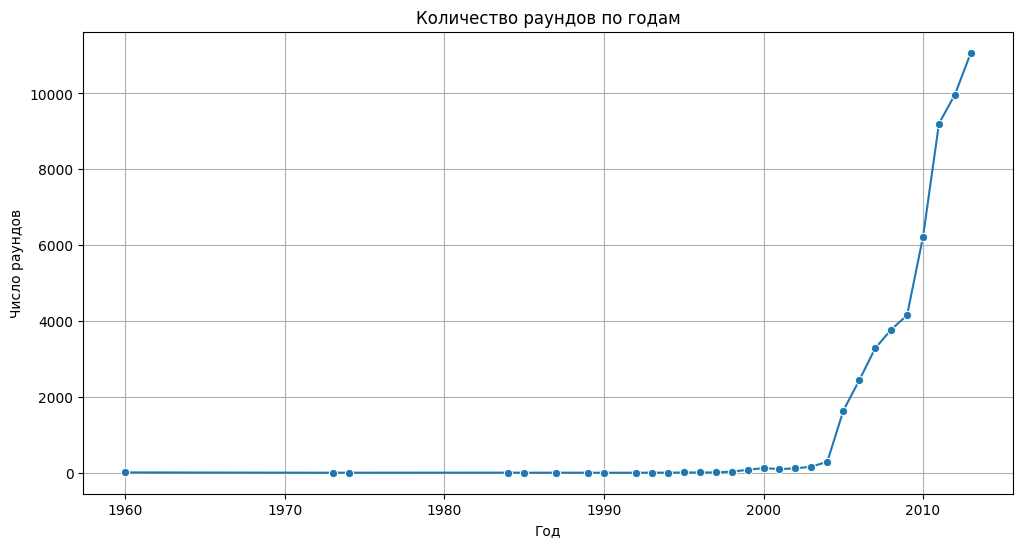

In [74]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=agg_data, x='year', y='rounds_count', marker='o')
plt.title('Количество раундов по годам')
plt.xlabel('Год')
plt.ylabel('Число раундов')
plt.grid(True)
plt.show()

**Вывод:**
- Количество инвестиционных раундов начало резко расти после 2000 года.  
- В 2010-х наблюдается экспоненциальный рост, что свидетельствует об активизации рынка инвестиций.

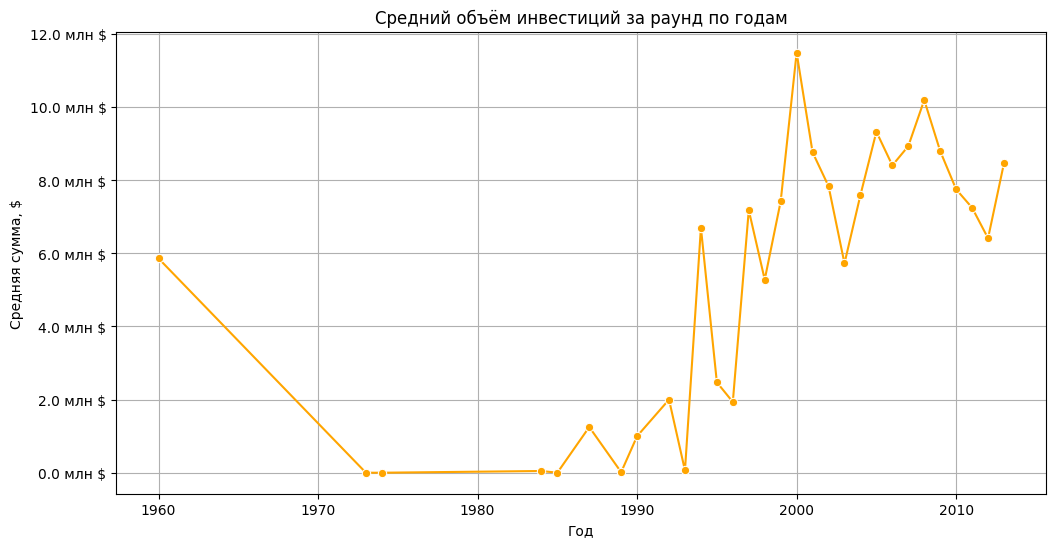

In [75]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=agg_data, x='year', y='avg_raised', marker='o', color='orange')

# Форматирование оси Y в миллионах долларов
def millions_formatter(x, pos):
    return f'{x/1_000_000:.1f} млн $'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Средний объём инвестиций за раунд по годам')
plt.xlabel('Год')
plt.ylabel('Средняя сумма, $')
plt.grid(True)
plt.show()

**Вывод:**
- До 1990-х годов средний размер инвестиций был крайне нестабильным.  
- В начале 2000-х средняя сумма инвестиций увеличилась и колебалась в диапазоне от 7 до 11 млн $ без явной тенденции к росту.

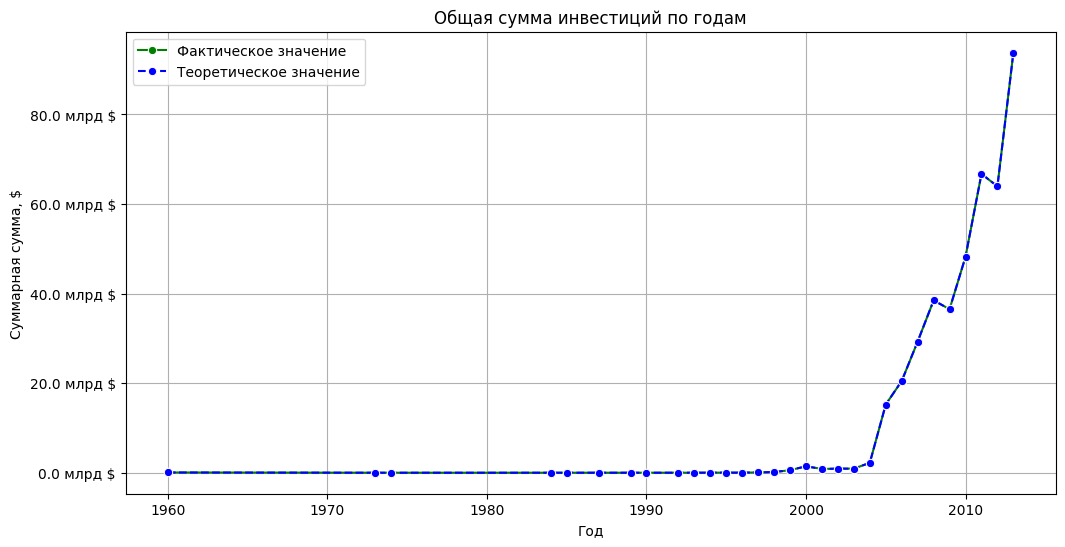

In [76]:
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=agg_data, x='year', y='total_raised', marker='o', color='green', label='Фактическое значение')
ax = sns.lineplot(data=agg_data, x='year', y='theoretical_value', marker='o', color='blue', linestyle='dashed', label='Теоретическое значение')

# Форматирование оси Y в миллионах долларов
def millions_formatter(x, pos):
    return f'{x/1_000_000_000:.1f} млрд $'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title("Общая сумма инвестиций по годам")
plt.xlabel("Год")
plt.ylabel("Суммарная сумма, $")
plt.grid(True)
plt.legend()
plt.show()

**Вывод:**
- Общая сумма инвестиций резко возросла после 2000 года.  
- Фактические значения следуют за теоретическими, что подтверждает тенденцию роста венчурного рынка.

In [77]:
agg_data['total_raised'] = agg_data['total_raised'].apply(lambda x: f"{x/1_000_000_000:.1f} млрд $" if pd.notna(x) else "—")
agg_data['avg_raised'] = agg_data['avg_raised'].apply(lambda x: f"{x/1_000_000:.1f} млн $" if pd.notna(x) else "—")
agg_data['theoretical_value'] = agg_data['theoretical_value'].apply(lambda x: f"{x/1_000_000:.1f} млн $" if pd.notna(x) else "—")

agg_data

,year,rounds_count,total_raised,avg_raised,theoretical_value
0,1960.0,9,0.1 млрд $,5.9 млн $,52.7 млн $
1,1973.0,1,0.0 млрд $,0.0 млн $,0.0 млн $
2,1974.0,2,0.0 млрд $,0.0 млн $,0.0 млн $
3,1984.0,3,0.0 млрд $,0.0 млн $,0.1 млн $
4,1985.0,1,0.0 млрд $,0.0 млн $,0.0 млн $
5,1987.0,2,0.0 млрд $,1.2 млн $,2.5 млн $
6,1989.0,1,0.0 млрд $,0.0 млн $,0.0 млн $
7,1990.0,1,0.0 млрд $,1.0 млн $,1.0 млн $
8,1992.0,1,0.0 млрд $,2.0 млн $,2.0 млн $
9,1993.0,2,0.0 млрд $,0.1 млн $,0.1 млн $


**Общий вывод:**
- Рынок инвестиций в стартапы находится на подъеме, но основной фактор этого роста — увеличение количества раундов, а не значительный рост финансирования на один стартап. 
- Количество раундов финансирования резко увеличилось после 2000 года, что указывает либо на рост числа стартапов, либо на увеличение числа сделок на один проект. При этом средний объем инвестиций на один раунд остается относительно стабильным, колеблясь в диапазоне 7–11 млн $. 
- Общая сумма вложений демонстрирует экспоненциальный рост, но он обеспечен расширением числа сделок, а не увеличением сумм, выделяемых на стартапы. Это говорит о повышенной активности венчурных фондов и развитии стартап-экосистемы, где деньги распределяются среди большего числа компаний без резкого увеличения инвестиций на каждую из них.

[Вернуться к содержанию](#Содержание)

<a class="anchor" id="Люди-и-их-образование"></a>

---
### 3.2. Люди и их образование

#### 3.2.1. Рассмотрим `people.csv` и `education.csv` по отдельности

- `people`

In [78]:
people.head(1)

,id,first_name,last_name,company_id,network_username
0,10,mark,zuckerberg,5.0,NaN


In [79]:
people.shape[0]

226709

In [80]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': people.isna().sum(),
    'Percentage NaN': people.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
id,0,0.00%
first_name,12,0.01%
last_name,4,0.00%
company_id,192094,84.73%
network_username,187842,82.86%


- `education`

In [81]:
education.head(1)

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaT


In [82]:
education.shape[0]

109610

In [83]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': education.isna().sum(),
    'Percentage NaN': education.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
id,0,0.00%
person_id,0,0.00%
instituition,55,0.05%
graduated_at,51556,47.04%


#### 3.2.2. Объединение датасетов

In [84]:
# Объединяем данные по id и person_id (lEFT JOIN, чтобы сохранить всех сотрудников)
people_education = people.merge(education, left_on='id', right_on='person_id', how='left')

In [85]:
people_education = people_education.rename(columns={'id_x':'person_id',
                                                    'id_y':'education_id',
                                                    'person_id':'education_person_id'})

Переименовал для понимания и правильного анализа в последующем. В том числе это касается переименования `person_id` на `education_person_id`, ибо с одной стороны его можно просто удалить, с другой он может помочь в анализе, ибо показывается тех, у кого есть данные об образовании.

In [86]:
people_education[people_education['company_id']==1]

,person_id,first_name,last_name,company_id,network_username,education_id,education_person_id,instituition,graduated_at
4393,104800,alex,weinstein,1.0,alexweinstein,NaN,NaN,NaN,NaT
191139,3,kevin,flaherty,1.0,NaN,706.0,3.0,washington university in st louis,NaT
191140,3,kevin,flaherty,1.0,NaN,707.0,3.0,indiana university,NaT


Удалим дубликаты, но чтобы остались точно те строки, где у человека есть информация об образовании, то есть, если на человека две записи, то удаляться будет та, у которой меньше данных об образовании или вообще нет. Для этого проведем несколько манипуляций.

In [87]:
# Определяем столбцы, по которым удаляем дубликаты
subset_cols = ['person_id', 'first_name', 'last_name']

# Определяем столбцы, которые должны быть максимально заполнены
edu_cols = ['education_id', 'education_person_id', 'instituition', 'graduated_at']

# Создаем вспомогательный столбец с количеством ненулевых значений в важных колонках
people_education['non_null_count'] = people_education[edu_cols].notna().sum(axis=1)

# Сортируем так, чтобы строки с максимальным числом заполненных значений шли первыми
people_education = people_education.sort_values(by=['non_null_count'], ascending=False)

# Удаляем дубликаты, сохраняя первую (наиболее заполненную) строку
people_education = people_education.drop_duplicates(subset=subset_cols, keep='first')

# Удаляем вспомогательный столбец
people_education = people_education.drop(columns=['non_null_count'])

Теперь в наших данных не должно быть дубликатов, поэтому минимизируются возможные отклонения. Причём мы не потеряем данные о тех сотрудниках, которые имеют какую либо информацию об образовании (например, на пользователя две строки, но в одной нет данных об образовании, а во второй есть, однако здесь сохранится именно та, в которой есть информация; в случае же когда информации нет совсем, нам подойдет любая строка о пользователе).

In [88]:
people_education.shape[0]

226708

In [89]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': people_education.isna().sum(),
    'Percentage NaN': people_education.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
person_id,0,0.00%
first_name,12,0.01%
last_name,4,0.00%
company_id,192094,84.73%
network_username,187841,82.86%
education_id,158637,69.97%
education_person_id,158637,69.97%
instituition,158670,69.99%
graduated_at,189737,83.69%


#### 3.2.3. Оценка средней доли сотрудников без информации об образовании в каждой группе

За информацию буду считать все, то есть любые возможные данные из education.

In [90]:
people_education['has_education'] = (people_education[['education_id', 'education_person_id', 'instituition', 'graduated_at']].notna().any(axis=1))

Добавлю индикатор -1 в `company_id`, так как логичный способ восстановления данных отсутствует

In [91]:
people_education['company_id'] = people_education['company_id'].fillna(-1).astype(int)

In [92]:
# Группируем по компаниям и считаем количество сотрудников в каждой компании
company_sizes = people_education.groupby('company_id')['person_id'].count().reset_index()
company_sizes.columns = ['company_id', 'num_employees']

In [93]:
# Считаем долю сотрудников без образования в каждой компании (если компания не найдена, ставим 0)
education_rate = people_education.groupby('company_id')['has_education'].mean().reset_index()
education_rate.columns = ['company_id', 'education_rate']

In [94]:
# Объединяем информацию о размере компании и доле сотрудников без образования
company_data = company_sizes.merge(education_rate, on='company_id', how='left')

In [95]:
# Заполняем пропущенные значения в education_rate (если для компании нет данных — значит, у всех сотрудников нет образования)
company_data['education_rate'] = company_data['education_rate'].fillna(0)

Посмотрим на распределение количества сотрудников, которое покажет нам частоту значений количества сотрудников в стартапах.

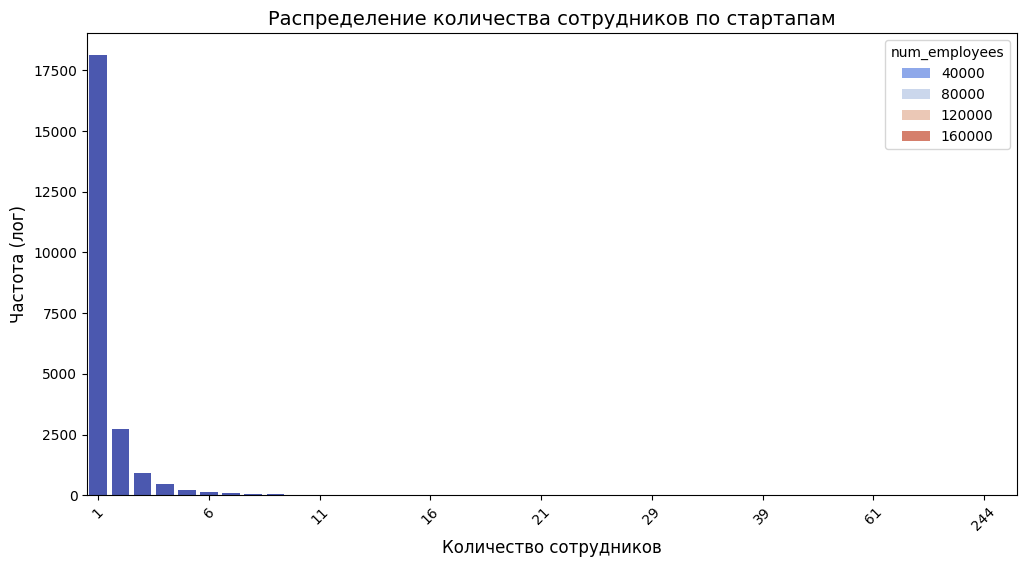

In [96]:
plt.figure(figsize=(12,6))

# Строим countplot
ax = sns.countplot(data=company_data, x='num_employees', hue='num_employees', palette="coolwarm")

# Добавляем подписи
ax.set_xlabel('Количество сотрудников', fontsize=12)
ax.set_ylabel('Частота (лог)', fontsize=12)
ax.set_title('Распределение количества сотрудников по стартапам', fontsize=14)

# Уменьшаем количество подписей на X (чтобы они не накладывались)
plt.xticks(rotation=45)
ax.set_xticks(ax.get_xticks()[::5])  # Показываем только каждую 5-ю подпись

plt.show()

Видно, что подавляющее большинство компаний имеет небольшое число сотрудников, при этом наиболее частое значение – 1 сотрудник. После этого частота резко уменьшается, и компании с более чем 5-10 сотрудниками встречаются значительно реже. Распределение сильно скошено вправо, что говорит о том, что стартапы, как правило, начинаются с очень небольших команд, что логично. Дальше посмотрим на countplot со шкалой, логарифмированной по натуральному логарифму (ln), то есть с основанием e. 

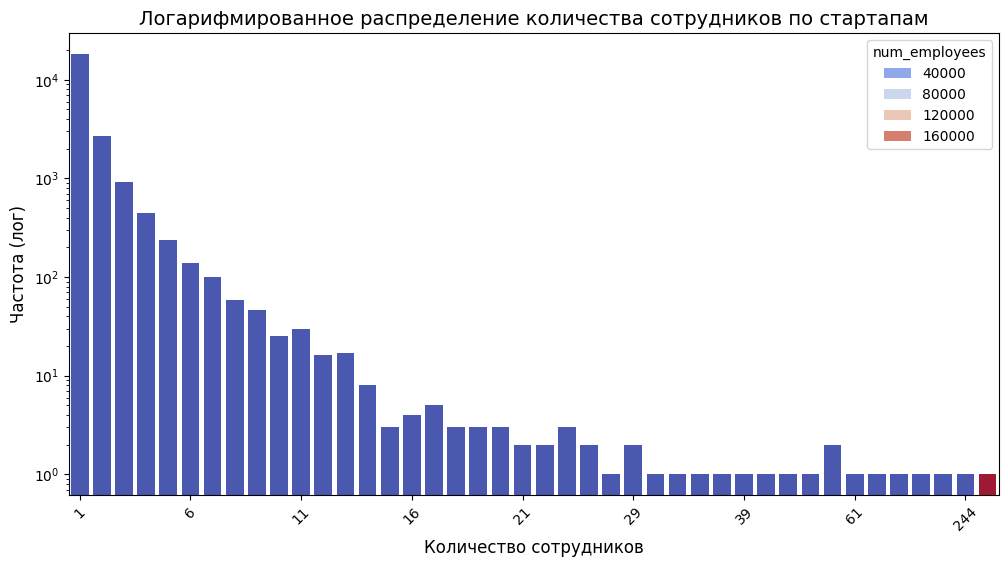

In [97]:
plt.figure(figsize=(12,6))

# Строим countplot
ax = sns.countplot(data=company_data, x='num_employees', hue='num_employees', palette="coolwarm")

# Добавляем подписи
ax.set_xlabel('Количество сотрудников', fontsize=12)
ax.set_ylabel('Частота (лог)', fontsize=12)
ax.set_title('Логарифмированное распределение количества сотрудников по стартапам', fontsize=14)

# Делаем логарифмическую шкалу Y
ax.set_yscale('log')

# Уменьшаем количество подписей на X (чтобы они не накладывались)
plt.xticks(rotation=45)
ax.set_xticks(ax.get_xticks()[::5])  # Показываем только каждую 5-ю подпись

plt.show()

Второй график, представленный в логарифмическом масштабе, подтверждает предыдущие наблюдения, но делает более заметными различия в частотах для разных диапазонов. Видно, что количество стартапов убывает экспоненциально по мере увеличения числа сотрудников. Также логарифмический масштаб помогает выделить редкие случаи компаний с сотнями и тысячами сотрудников, которые не были так явно видны на первом графике.

In [98]:
company_data.head()

,company_id,num_employees,education_rate
0,-1,192094,0.258243
1,1,2,0.500000
2,2,1,1.000000
3,3,3,0.666667
4,4,13,0.923077


**Разделим на группы**

In [99]:
# Определяем границы групп по количеству сотрудников
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

Данное разбиение данных на группы (бины) учитывает особенности распределения, поскольку основной упор сделан на детализацию малых значений (1, 2, 3, 4-5, 6-10, 11-25), а компании с большим штатом (26+) вынесены в отдельную категорию. Такое разбиение оправдано, так как позволяет более точно анализировать наиболее многочисленные группы стартапов, а также разбить группы на более или менее равные из-за большей (причём намного) частоты малых значений.

In [100]:
# Применяем категорийное разбиение
company_data['startup_size'] = pd.cut(company_data[company_data['company_id'] != -1]['num_employees'], bins=bins, labels=labels, right=True)

In [101]:
# Добавляем категорию "Unknown" для сотрудников без информации о компании
company_data['startup_size'] = company_data['startup_size'].astype('category')
company_data['startup_size'] = company_data['startup_size'].cat.add_categories(['unknown'])
company_data['startup_size'] = company_data['startup_size'].fillna('unknown')

In [102]:
# Рассчитываем среднюю долю сотрудников c образованием по группам стартапов
education_summary = company_data.groupby('startup_size', observed=False)['education_rate'].mean().reset_index()
education_summary.columns = ['startup_size', 'avg_education_rate']

# А теперь долю без него
education_summary['missing_avg_education_rate'] = 1 - education_summary['avg_education_rate']

In [103]:
education_summary

,startup_size,avg_education_rate,missing_avg_education_rate
0,1,0.537425,0.462575
1,2,0.533961,0.466039
2,3,0.513210,0.486790
3,4-5,0.502693,0.497307
4,6-10,0.468172,0.531828
5,11-25,0.541240,0.458760
6,26+,0.734534,0.265466
7,unknown,0.258243,0.741757


**Вывод:**
- Чем меньше стартап, тем выше доля сотрудников без информации об образовании. В группе с 1 сотрудником 46.3% данных об образовании отсутствует, что может указывать на менее формализованный процесс учета в небольших компаниях;
- В стартапах с 2-3 сотрудниками процент пропущенных данных остается на уровне 46-48%, что свидетельствует о схожих проблемах с регистрацией информации об образовании в малых компаниях;
- В группах 4-25 сотрудников уровень отсутствующей информации увеличивается до 49-53%, что может быть связано с тем, что в компаниях этого размера встречаются разные модели учета данных, и не все сотрудники предоставляют сведения об образовании;
- В самых крупных стартапах (26+) доля отсутствующих данных значительно ниже и составляет 26.5%, что подтверждает, что более крупные компании чаще ведут учет образования своих сотрудников;
- В целом, чем больше стартап, тем выше вероятность наличия информации об образовании сотрудников, а в небольших и неидентифицированных компаниях пропуски встречаются чаще;
- Дополнительно выделенная группа "unknown", в которой у сотрудников нет данных о `company_id`, у 74% сотрудников отсутствует информации об образовании, что означает отсутствие данных не только по столбцу `company_id`, но и информации об образовании. В целом, по этой группе сложно сделать конкретный вывод;
- На графике можно лицезреть все эти выводы более наглядным образом.

***Дополнительная визуализация***

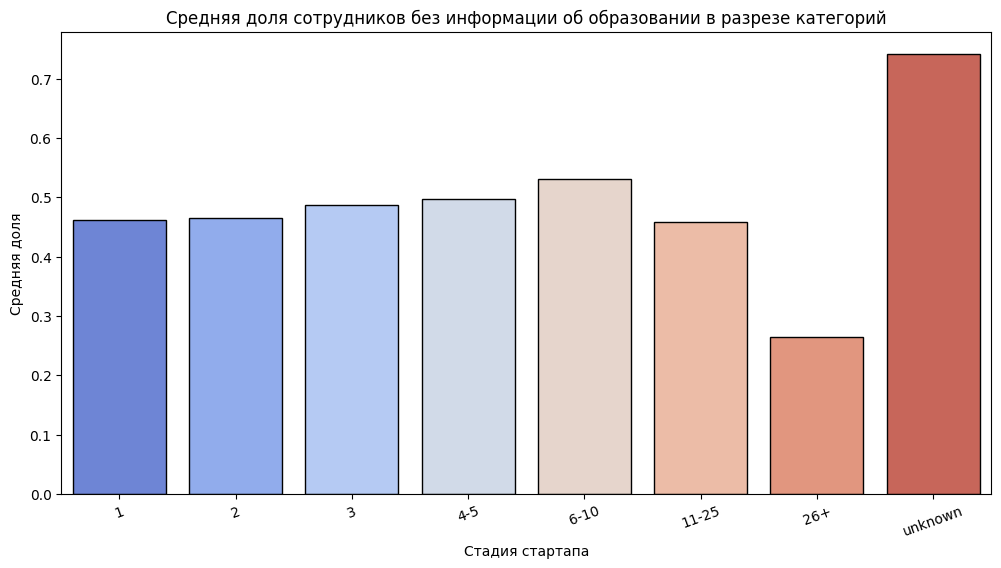

In [104]:
# Создаем фигуру и оси
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=education_summary['startup_size'], 
    y=education_summary['missing_avg_education_rate'], 
    edgecolor='black',
    palette="coolwarm",
    hue=education_summary['startup_size']
)

# Добавляем подписи
plt.xlabel('Стадия стартапа')
plt.ylabel('Средняя доля')
plt.title('Средняя доля сотрудников без информации об образовании в разрезе категорий')

# Настройка подписей оси X
plt.xticks(rotation=20)

# Отображаем график
plt.show()

#### 3.2.4. Возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`

In [105]:
degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,mba,NaN
1,2,p:6136,ba,"english, french"
2,3,p:6136,ms,mass communication
3,4,p:6005,ms,internet technology
4,5,p:5832,bcs,"computer science, psychology"


In [106]:
people_education.head()

,person_id,first_name,last_name,company_id,network_username,education_id,education_person_id,instituition,graduated_at,has_education
267691,118386,ricardo,durand,143419,itechsocialnet,18871.0,118386.0,escs,2004-01-01,True
267690,174088,dr. ray,woods,188200,network,25958.0,174088.0,sydney university medical school,1982-01-01,True
267687,99997,peter,lalonde,83651,peterlalonde,69684.0,99997.0,john abbott college,1989-01-01,True
267667,9998,eric,jensen,1607,ej,41088.0,9998.0,illinois institute of technology,2006-01-01,True
267660,99974,eric,magnuson,48256,NaN,14427.0,99974.0,bainbridge graduate institute,2005-01-01,True


Можно присоединить по столбцам `object_id` и `person_id`. Это поможет, если, например, у человека в `instituition` или `graduated_at`пропуск, но в датасете `degrees` есть какая-либо информация об обучении: в столбцах `object_id`(учитываем его, ибо будем соединять по отчищенному) и так далее. Поэтому убираем в начале "p:", создавая новый столбец `person_id`, и скрещиваем по id сотрудников.

In [107]:
degrees['person_id'] = degrees['object_id'].str.replace("p:", "").astype(int)

In [108]:
# Объединяем degrees с people_education (по person_id и object_id)
people_education_degrees = people_education.merge(degrees, on='person_id', how='left')

In [109]:
people_education_degrees.head()

,person_id,first_name,last_name,company_id,network_username,education_id,education_person_id,instituition,graduated_at,has_education,id,object_id,degree_type,subject
0,118386,ricardo,durand,143419,itechsocialnet,18871.0,118386.0,escs,2004-01-01,True,18871.0,p:118386,phd,journalism
1,174088,dr. ray,woods,188200,network,25958.0,174088.0,sydney university medical school,1982-01-01,True,25958.0,p:174088,m.b.b.s.,medicine
2,99997,peter,lalonde,83651,peterlalonde,69684.0,99997.0,john abbott college,1989-01-01,True,69682.0,p:99997,ba,communications
3,99997,peter,lalonde,83651,peterlalonde,69684.0,99997.0,john abbott college,1989-01-01,True,69683.0,p:99997,minor,economics
4,99997,peter,lalonde,83651,peterlalonde,69684.0,99997.0,john abbott college,1989-01-01,True,69684.0,p:99997,dec,communications


**Проведём анализ**

Теперь за наличие данных об образовании будем считать и все, что есть в `education`, и все,что есть в `degrees`.

In [110]:
# Определяем, у кого есть информация об образовании (если хотя бы один из этих столбцов НЕ NaN)
people_education_degrees['ped_has_education'] = (
    people_education_degrees[['education_id', 'education_person_id', 'object_id', 'degree_type', 'subject', 'instituition', 'graduated_at', 'id']]
    .notna()
    .any(axis=1)
)

In [111]:
# Заполняем пропущенные company_id значением -1 (если компания неизвестна)
people_education_degrees['company_id'] = people_education_degrees['company_id'].fillna(-1).astype(int)

In [112]:
# Группируем по компаниям и считаем количество сотрудников в каждой компании
ped_company_sizes = people_education_degrees.groupby('company_id')['person_id'].count().reset_index()
ped_company_sizes.columns = ['company_id', 'num_employees']

In [113]:
# Считаем долю сотрудников с образованием в каждой компании (если компания не найдена, ставим 0)
ped_education_rate = people_education_degrees.groupby('company_id')['ped_has_education'].mean().reset_index()
ped_education_rate.columns = ['company_id', 'education_rate']

In [114]:
# Объединяем информацию о размере компании и доле сотрудников с образованием
ped_company_data = ped_company_sizes.merge(ped_education_rate, on='company_id', how='left')

In [115]:
# Заполняем пропущенные значения в education_rate (если для компании нет данных — значит, у всех сотрудников нет образования)
ped_company_data['education_rate'] = ped_company_data['education_rate'].fillna(0)

In [116]:
# Определяем границы групп по количеству сотрудников
bins = [0, 1, 2, 3, 5, 10, 25, float('inf')] 
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26+']

# Применяем категорийное разбиение
ped_company_data['startup_size'] = pd.cut(ped_company_data[ped_company_data['company_id'] != -1]['num_employees'], bins=bins, labels=labels, right=True)

In [117]:
# Добавляем категорию "Unknown" для сотрудников без информации о компании
ped_company_data['startup_size'] = ped_company_data['startup_size'].astype('category')
ped_company_data['startup_size'] = ped_company_data['startup_size'].cat.add_categories(['unknown'])
ped_company_data['startup_size'] = ped_company_data['startup_size'].fillna('unknown')

# Рассчитываем среднюю долю сотрудников без информации об образования по группам стартапов
ped_education_summary = ped_company_data.groupby('startup_size', observed=False)['education_rate'].mean().reset_index()
ped_education_summary.columns = ['startup_size', 'avg_education_rate']

In [118]:
# Рассчитываем среднюю долю сотрудников с информацией об образовании по группам стартапов
ped_education_summary = ped_company_data.groupby('startup_size', observed=False)['education_rate'].mean().reset_index()
ped_education_summary.columns = ['startup_size', 'avg_education_rate']

# А теперь долю без него
ped_education_summary['missing_avg_education_rate'] = 1 - ped_education_summary['avg_education_rate']

In [119]:
ped_education_summary

,startup_size,avg_education_rate,missing_avg_education_rate
0,1,0.407732,0.592268
1,2,0.773390,0.226610
2,3,0.772572,0.227428
3,4-5,0.724257,0.275743
4,6-10,0.688251,0.311749
5,11-25,0.693875,0.306125
6,26+,0.796518,0.203482
7,unknown,0.360773,0.639227


**Вывод:**
- Чем меньше стартап, тем выше доля сотрудников без информации об образовании, но во второй выборке заметно больше заполненных данных, что связано с добавлением дополнительной таблицы, содержащей информацию об образовании;
- В стартапах с 1 сотрудником доля пропущенных данных выросла с 46.2% до 59.2%, что может указывать на менее полную регистрацию информации в новой выборке или на то, что в этот раз дополненные данные не охватывают эту группу в достаточной мере;
- Стартапы с 2-3 сотрудниками значительно улучшили заполненность — доля отсутствующих данных снизилась с 46-49% до 22.6-22.7%, что говорит о том, что новая таблица внесла существенный вклад в уточнение информации об образовании этой группы;
- В средних стартапах (4-25 человек) уровень отсутствующих данных остался стабильным (27-31%), что указывает на то, что дополнительная информация по этим группам не внесла значительных изменений;
- В крупных стартапах (26+) процент отсутствующей информации снизился с 26.5% до 20.3%, что подтверждает, что более крупные компании лучше фиксируют данные о своих сотрудниках, а дополненная таблица помогла улучшить покрытие;
- Категория "unknown" также показала улучшение в заполненности данных — доля пропусков снизилась с 74% до 63.9%. Однако это по-прежнему самый проблемный сегмент, где, возможно, у компаний либо действительно меньше сотрудников с формальным образованием, либо данные о них не были добавлены даже после объединения таблиц;
- В целом, основное улучшение заполненности данных произошло в группах с 2-3 и 26+ сотрудниками, что подтверждает эффективность объединения таблиц, однако у стартапов с 1 сотрудником стало больше пропусков, что может быть связано с недостатком информации по этой группе даже после дополнения;
- На графике можно увидеть, как объединение данных повлияло на улучшение заполненности, особенно для средних и крупных компаний.

***Дополнительная визуализация***

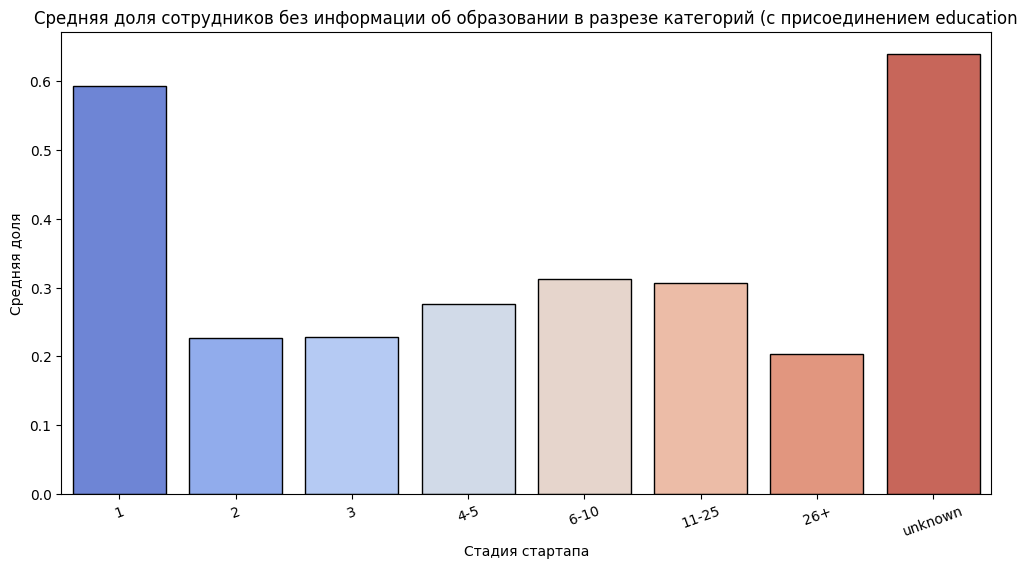

In [120]:
# Создаем фигуру и оси
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=ped_education_summary['startup_size'], 
    y=ped_education_summary['missing_avg_education_rate'], 
    edgecolor='black',
    palette="coolwarm",
    hue=ped_education_summary['startup_size']
)

# Добавляем подписи
plt.xlabel('Стадия стартапа')
plt.ylabel('Средняя доля')
plt.title('Средняя доля сотрудников без информации об образовании в разрезе категорий (с присоединением education')

# Настройка подписей оси X
plt.xticks(rotation=20)

# Отображаем график
plt.show()

**Наглядное сравнение**

In [121]:
html1 = education_summary.to_html()
html2 = ped_education_summary.to_html()
html3 = pd.DataFrame(company_data['startup_size'].value_counts()).reset_index().sort_values(by=['count'], ascending=False).to_html()
html4 = pd.DataFrame(ped_company_data['startup_size'].value_counts()).reset_index().sort_values(by=['count'], ascending=False).to_html()

In [122]:
# Объединяем HTML-код с расположением в два столбца
display(HTML(f"""
    <div style="display: flex; justify-content: space-around;">
        <div style="width: 45%; overflow-x: auto">{html1}</div>
        <div style="width: 45%; overflow-x: auto">{html2}</div>
    </div>
"""))

,startup_size,avg_education_rate,missing_avg_education_rate
0,1,0.537425,0.462575
1,2,0.533961,0.466039
2,3,0.513210,0.486790
3,4-5,0.502693,0.497307
4,6-10,0.468172,0.531828
5,11-25,0.541240,0.458760
6,26+,0.734534,0.265466
7,unknown,0.258243,0.741757
,startup_size,avg_education_rate,missing_avg_education_rate
0,1,0.407732,0.592268


***Количество сотрудников в каждой группе***

In [123]:
# Объединяем HTML-код с расположением в два столбца
display(HTML(f"""
    <div style="display: flex; justify-content: space-around;">
        <div style="width: 45%; overflow-x: auto">{html3}</div>
        <div style="width: 45%; overflow-x: auto">{html4}</div>
    </div>
"""))

,startup_size,count
0,1,18116
1,2,2709
2,3,921
3,4-5,687
4,6-10,368
5,11-25,101
6,26+,19
7,unknown,1
,startup_size,count
0,1,14149


**Вывод:**
- Чем меньше стартап, тем выше доля сотрудников без информации об образовании, однако после объединения данных произошли изменения в распределении количества стартапов по группам.
- В группе с 1 сотрудником доля сотрудников без информации уменьшилась (46.3%), но одновременно число стартапов в этой категории снизилось (18116 -> 14149). Это может означать, что часть компаний либо была реклассифицирована в другие группы после объединения данных.
- Группы с 2-3 сотрудниками продемонстрировали значительное снижение доли пропущенных данных (с 46-49% до 22-23%), при этом количество компаний в этих категориях увеличилось (2709 → 4735 и 921 → 1857). Это подтверждает, что объединение данных позволило улучшить полноту информации именно в этих группах.
- Средние стартапы (4-25 сотрудников) показали умеренное снижение пропусков (27-31%), но их общее количество также выросло. Например, для группы 4-5 сотрудников число компаний увеличилось с 687 до 1278, а в группе 6-10 – с 368 до 672. Это говорит о том, что объединенные данные позволили лучше распределить компании по размерам и учесть ранее отсутствующую информацию.
- Крупные стартапы (26+) теперь содержат меньше сотрудников без данных об образовании (20.3%), при этом количество компаний в этой группе также увеличилось с 19 до 35. Это подтверждает, что в крупных компаниях данные фиксируются лучше, а объединение баз данных позволило учесть ранее пропущенные сведения.
- Категория "unknown" остается самой проблемной (63.9% пропусков), но ее количество не изменилось (осталось 1), что указывает на ограниченность доступных данных по этой группе.

**Общий вывод:**<br>
Объединение данных существенно повлияло на распределение компаний по группам:
- Количество стартапов с 1 сотрудником уменьшилось, а в группах с 2+ сотрудниками увеличилось, что говорит о более точной классификации.
- Средняя доля сотрудников без информации об образовании уменьшилась во всех группах, кроме "unknown", особенно в стартапах с 2-3 сотрудниками.
- Крупные стартапы (26+) также продемонстрировали улучшение заполненности данных, что подтверждает, что более крупные компании ведут лучший учет сотрудников.

В целом, объединение данных повысило полноту информации и перераспределило компании по категориям, что позволило сократить долю сотрудников с неизвестным образованием. Однако для стартапов с 1 сотрудником и категории "unknown" остаются значительные пробелы в данных, требующие дополнительного анализа.


[Вернуться к содержанию](#Содержание)

<a class="anchor" id="Объединять-или-не-объединять"></a>

---
### 3.3. Объединять или не объединять — вот в чём вопрос

**Датасеты, где есть столбец с названием `network_username`**

---
1. Основные датасеты

- `company_and_rounds`

In [124]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [125]:
company_and_rounds[company_and_rounds['network_username'].notna()].head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,funded_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
9,100042.0,hostnine,NaN,operating,NaT,NaT,hostnine.com,hostnine,NaN,0.0,...,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
11,100062.0,vetter idea management system,enterprise,operating,2011-08-01,NaT,getvetter.com,getvetter,NaN,0.0,...,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


- `people`

In [126]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226697 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [127]:
people[people['network_username'].notna()].head()

,id,first_name,last_name,company_id,network_username
6,100006,courtney,homer,81558.0,jobsbostontech
8,100010,michael,dadashyan,NaN,fbroulette
16,100018,adam,beckerman,148554.0,adam_beckerman
17,100019,melissa,french,NaN,netcastles
18,100022,oäuz kaäan,aslan,NaN,oguzkaganaslan


---
2. Дополнительные датасеты

- `fund`

In [128]:
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11649 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


In [129]:
fund[fund['network_username'].notna()].head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
1,1,greylock partners,1965-01-01,greylock.com,greylockvc,usa,307,196,0
18,10015,imi.vc,2011-07-31,imi.vc,imi_vc,rus,2,2,4
20,1002,alven capital,2000-01-01,alvencapital.com,alvencap,fra,43,36,1
21,10020,east valley ventures,2011-01-01,eastvalleyventures.com,eastvalleyvent,can,2,2,0
23,10022,venture partners,2011-01-01,vpartners.vc,venture_i,NaN,3,3,0


**Можно ли использовать столбцы с именем `network_username` для объединения данных**

In [130]:
# Приводим к нижнему регистру и ищем пересечение
common_usernames = (
                   set(fund['network_username'].str.lower()) & 
                   set(people['network_username'].str.lower()) & 
                   set(company_and_rounds['network_username'].str.lower())
                   )

# Проверяем, есть ли вообще совпадения
has_matches = bool(common_usernames)

print(has_matches)  # True, если есть хотя бы одно совпадение

True


In [131]:
# Приводим к нижнему регистру и ищем пересечение
common_usernames = (
                   set(people['network_username'].str.lower()) & 
                   set(company_and_rounds['network_username'].str.lower())
                   )

# Проверяем, есть ли вообще совпадения
has_matches = bool(common_usernames)

print(has_matches)  # True, если есть хотя бы одно совпадение

True


In [132]:
# Приводим к нижнему регистру и ищем пересечение
common_usernames = (
                   set(fund['network_username'].str.lower()) & 
                   set(company_and_rounds['network_username'].str.lower())
                   )

# Проверяем, есть ли вообще совпадения
has_matches = bool(common_usernames)

print(has_matches)  # True, если есть хотя бы одно совпадение

True


In [133]:
# Приводим к нижнему регистру и ищем пересечение
common_usernames = (
                   set(fund['network_username'].str.lower()) & 
                   set(people['network_username'].str.lower())
                   )

# Проверяем, есть ли вообще совпадения
has_matches = bool(common_usernames)

print(has_matches)  # True, если есть хотя бы одно совпадение

True


Во-первых, можно увидеть, что по столбцу `network_username` есть совпадения и сразу по всем 3-ём датасетам и попарно с каждым.

In [134]:
# Проверяем количество повторений network_username в каждом датасете
fund_dupes = fund['network_username'].str.lower().value_counts()
people_dupes = people['network_username'].str.lower().value_counts()
company_dupes = company_and_rounds['network_username'].str.lower().value_counts()

# Выводим пользователей, которые встречаются более одного раза
print("Повторяющиеся network_username в fund:")
display(fund_dupes[fund_dupes > 1])

print("\nПовторяющиеся network_username в people:")
display(people_dupes[people_dupes > 1])

print("\nПовторяющиеся network_username в company_and_rounds:")
display(company_dupes[company_dupes > 1])

Повторяющиеся network_username в fund:


network_username
svb_financial      4
growthworks        4
annarborspark      3
rwe_ag             3
kfw                3
upfrontvc          3
osagevc            3
austinventures     2
birchmerevc        2
innovacomvc        2
innovasjonnorge    2
ignia_fund         2
rhoventures        2
dev                2
clubitalia2        2
goldmansachs       2
blackbirdvc        2
bpifrance          2
morganstanley      2
blackstone         2
startupminds       2
pmvnv              2
rwbaird            2
guggenheimptnrs    2
iaventures         2
wedodeals          2
kpcb               2
omidyarnetwork     2
newfund            2
creditsuisse       2
bdc_news           2
citgapfunds        2
dfjvc              2
sequoia_capital    2
htgf_              2
nationalbank       2
nwangelconf        2
confrapar          2
grayghostvt        2
nsvf               2
enterpriselou      2
signal_peak        2
thomvest           2
shinhanbankeng     2
arcangelfund       2
nab                2
coreemc          


Повторяющиеся network_username в people:


network_username
iwatchlife         6
chrislogan         5
connectandsell     4
firstscribe        4
osiaffiliate       3
                  ..
michaelreyes1      2
thierrytechy       2
francoislaberge    2
explolab           2
mapmydeals         2
Name: count, Length: 460, dtype: int64


Повторяющиеся network_username в company_and_rounds:


network_username
goodman_uk         20
deemsmart          18
indiamart          18
tyropayments       15
mobivery           15
                   ..
decatv              2
amiestreet_logs     2
kasidie             2
kentauragames       2
inyoursocialnet     2
Name: count, Length: 8525, dtype: int64

Однако, во всех датасетах по столбцу `network_username` присутствуют дубликаты.

**Диаграммы Венна**

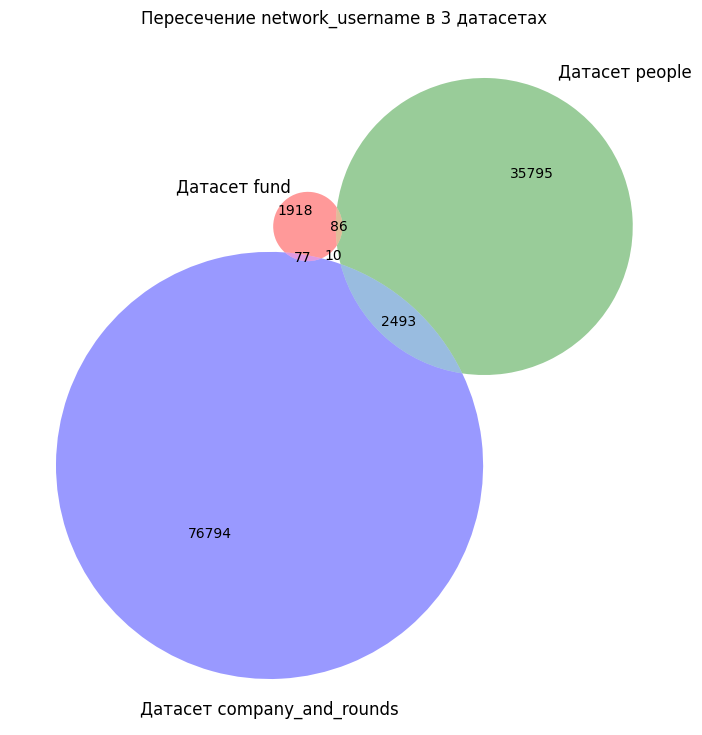

In [135]:
# Приводим к нижнему регистру и удаляем NaN перед преобразованием в set
fund_names = set(fund['network_username'].dropna().str.lower())  
people_names = set(people['network_username'].dropna().str.lower())  
company_names = set(company_and_rounds['network_username'].dropna().str.lower())  # Здесь была ошибка

# Строим диаграмму Венна
plt.figure(figsize=(9,9))
venn3([fund_names, people_names, company_names], ('Датасет fund', 'Датасет people', 'Датасет company_and_rounds'))
plt.title("Пересечение network_username в 3 датасетах")
plt.show()

**Вывод:**

Диаграмма Венна показывает, что пересечений между тремя датасетами крайне мало:
- Большинство значений `network_username` уникальны для каждого датасета.
- Только 10 значений встречаются одновременно во всех трёх таблицах.
- Наибольшее пересечение между `company_and_rounds` и `people` — 2493 записи, но относительно общего объёма данных это небольшой процент.

*Что это означает?*
- Объединение через `inner join` приведёт к значительной потере данных, так как останутся только совпадающие записи.
- Использование `outer join` создаст множество `NaN', поскольку большинство значений уникальны.
- Объединение по `network_username` не даст значительного прироста информации**, поэтому перед `join` стоит агрегировать данные или выбрать основную таблицу для `left join`.

---

**Общий вывод: объединять или не объединять по `network_username`?**

- Объединение по `network_username` возможно, но требует осмысленного подхода. Данные показывают, что пересечений между датасетами мало, что снижает ценность объединения. В добавок, `network_username` не является уникальным идентификатором и встречается в разных таблицах с разной частотой, что приводит к дублированию записей. Подобное будет корректно только при условии, что дубликаты являются важными и оправдаными для конкретного анализа.  

- Если использовать `inner join`, в итоговой таблице останется только небольшая часть данных, так как большая часть `network_username` уникальна для каждого датасета, что в теории может быть полезно при анализе. `outer join`, напротив, сохранит все записи, но добавит множество `NaN`, увеличивая сложность обработки. Это же касается и `right join` с `left join`.

- Если одна из таблиц важнее, наиболее осмысленным вариантом является `left join`, поскольку он сохранит её данные и добавит информацию из других таблиц без потери ключевых записей. Если важно просто пересечение, то `inner join`, однако это либо специфический анализ, либо какая-то промежуточная итерация для исследований.

- В целом, объединение по `network_username` не даст значительного прироста информации, но может быть полезным для специфического анализа, например, изучения связей между компаниями, фондами и людьми. Без чёткого понимания цели объединения оно скорее усложнит обработку данных, чем принесёт пользу.


[Вернуться к содержанию](#Содержание)

<a class="anchor" id="Проблемный-датасет-и-причина-возникновения-пропусков"></a>

---
### 3.4. Проблемный датасет и причина возникновения пропусков

- `company_and_rounds`

In [136]:
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217471 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [137]:
company_and_rounds.iloc[:,:11].head(3)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0
1,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0
2,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0


In [138]:
company_and_rounds.iloc[:,11:].head(3)

,funding_total,milestones,funding_round_id,funded_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0


**Пропуски**

In [139]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': company_and_rounds.isna().sum(),
    'Percentage NaN': company_and_rounds.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
company_id,302,0.14%
name,303,0.14%
category_code,73888,33.93%
status,302,0.14%
founded_at,107818,49.51%
closed_at,214325,98.42%
domain,70615,32.43%
network_username,122240,56.13%
country_code,109167,50.13%
investment_rounds,302,0.14%


**Анализ пропусков с помощью библиотеки missingno**

<Axes: >

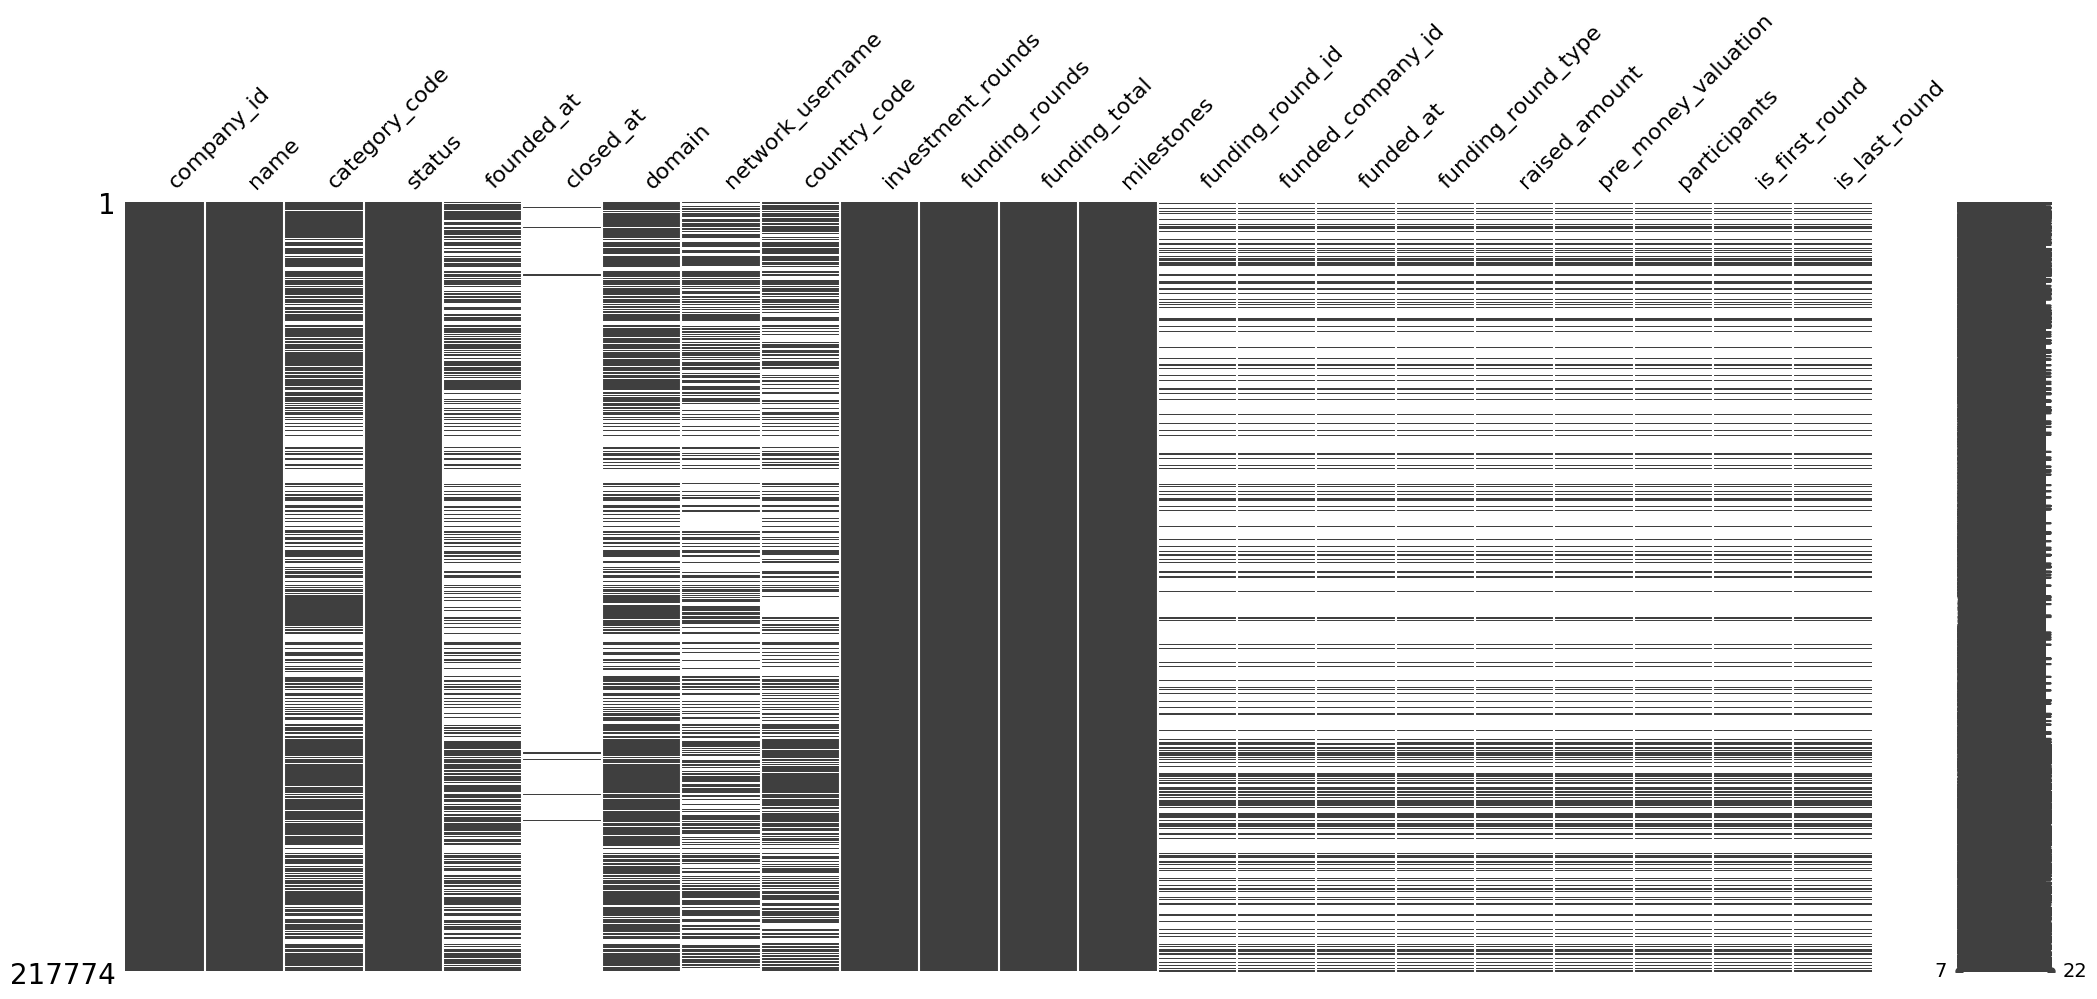

In [140]:
msno.matrix(company_and_rounds)

Тут можно увидеть интересную закономерность относительно той части датасета, которая в будущем станет одним из двух отдельных датасетов (`rounds`) - начиная с `funding_round_id`, пропуски пропуски в одних и тех же строках по каждой строке, вплоть до последнего столбца. 

---

**Работа с пропусками**

In [141]:
company = company_and_rounds.copy()

Сначала заполню построчно значениями `company_id` столбец `funded_company_id`, и наоборот. Остальное по `company_id` удалю, так как доля пропусков в нем и так невелика.

In [142]:
def fill_column_func(col1, col2):
    company[col1] = company[col1].fillna(company[col2])

fill_column_func('company_id', 'funded_company_id')
fill_column_func('funded_company_id', 'company_id')

In [143]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': company.isna().sum(),
    'Percentage NaN': company.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
company_id,0,0.00%
name,303,0.14%
category_code,73888,33.93%
status,302,0.14%
founded_at,107818,49.51%
closed_at,214325,98.42%
domain,70615,32.43%
network_username,122240,56.13%
country_code,109167,50.13%
investment_rounds,302,0.14%


---
Теперь попробуем обработать базовые столбцы для компаний, которые не касаются разных раундов инвестирования.

In [144]:
columns_to_fill = [
    'name',
    'category_code', 
    'status', 
    'founded_at', 
    'closed_at',
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones'
]

for col in columns_to_fill:
    # Собираем словарь {company_id: "первое ненулевое значение"}
    col_map = (
        company
        .dropna(subset=[col])               # убираем строки, где col == NaN
        .drop_duplicates(['company_id'])    # оставляем уникальные company_id
        .set_index('company_id')[col]       # индексуем по company_id
        .to_dict()
    )
    
    # Заполняем пропуски, подставляя значение из col_map
    company[col] = company[col].fillna(company['company_id'].map(col_map))

In [145]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': company.isna().sum(),
    'Percentage NaN': company.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
company_id,0,0.00%
name,303,0.14%
category_code,73888,33.93%
status,302,0.14%
founded_at,107818,49.51%
closed_at,214325,98.42%
domain,70615,32.43%
network_username,122240,56.13%
country_code,109167,50.13%
investment_rounds,302,0.14%


Ничего не изменилось, так что попробуем использовать другие датасеты.

---

Рассмотрим датасет `fund`.

In [146]:
fund.head()

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaT,NaN,NaN,NaN,0,0,0
1,1,greylock partners,1965-01-01,greylock.com,greylockvc,usa,307,196,0
2,10,mission ventures,1996-01-01,missionventures.com,NaN,usa,58,33,0
3,100,"kapor enterprises, inc.",NaT,kei.com,NaN,usa,2,1,0
4,1000,speed ventures,NaT,NaN,NaN,NaN,0,0,1


Можно проверить, бесполезен ли датасет `fund` для нас при заполнении имени.

In [147]:
filtered_company = company.merge(
    fund, 
    left_on=['company_id', 'name'], 
    right_on=['id', 'name'], 
    how='inner'
)

In [148]:
filtered_company

,company_id,name,category_code,status,founded_at_x,closed_at,domain_x,network_username_x,country_code_x,investment_rounds_x,...,is_first_round,is_last_round,id,founded_at_y,domain_y,network_username_y,country_code_y,investment_rounds_y,invested_companies,milestones_y


И пустой датафрейм, к сожалению, говорит нам о том, что `id` фондов никак не связан с `company_id`. В целом, об этом говорили и другие моменты.

Отсюда попробуем заполнить по совпадающим `name` информацию о компаниях, которая всегда общая.

In [149]:
columns_to_fill = [ 
    'founded_at', 
    'domain',
    'network_username',
    'country_code'
]

for col in columns_to_fill:
    # Собираем словарь {name: "первое ненулевое значение"}
    col_map = (
        fund
        .dropna(subset=[col])               # убираем строки, где col == NaN
        .drop_duplicates(['name'])    # оставляем уникальные company_id
        .set_index('name')[col]       # индексуем по company_id
        .to_dict()
    )
    
    # Заполняем пропуски, подставляя значение из col_map
    company[col] = company[col].fillna(company['name'].map(col_map))

In [150]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': company.isna().sum(),
    'Percentage NaN': company.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
company_id,0,0.00%
name,303,0.14%
category_code,73888,33.93%
status,302,0.14%
founded_at,107788,49.50%
closed_at,214325,98.42%
domain,70580,32.41%
network_username,122216,56.12%
country_code,109130,50.11%
investment_rounds,302,0.14%


Очень незначительно, но сократили пропуски по столбцам из списка, благодаря датасету `fund`.

---

In [151]:
company['country_code'].value_counts()

country_code
usa    68108
gbr     8356
can     4264
ind     4076
deu     2246
       ...  
som        1
rwa        1
civ        1
sdn        1
hnd        1
Name: count, Length: 175, dtype: int64

Иных вариантов заполнения столбцов `name`, `category_code`, `status`, `founded_at`, `closed_at`, `domain`, `network_username` и `country_code` реальными данными нет. Именно поэтому заполню категорией "unknown", где это возможно. Другим вариантом является заполнение модой, то есть самым популярным значением, но это исказит сильно данные, по моему, да и какой-то логичной категоризации, откуда брать моду, здесь нет. Можно попробовать через `geopy`, но это слишком большая нагрузка будет. Так что, опять же, заполню "unknown".

In [152]:
columns = ['name', 'category_code', 'status', 'domain', 'network_username', 'country_code']

for col in columns:
    company[col] = company[col].fillna("unknown")

In [153]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': company.isna().sum(),
    'Percentage NaN': company.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
company_id,0,0.00%
name,0,0.00%
category_code,0,0.00%
status,0,0.00%
founded_at,107788,49.50%
closed_at,214325,98.42%
domain,0,0.00%
network_username,0,0.00%
country_code,0,0.00%
investment_rounds,302,0.14%


---
Теперь обработаем пропуски по `investment_rounds`, `funding_rounds`, `funding_total` и `milestones`. Через условный датасет `fund` заполнить не получится, ибо там данные для фондов, которые нам ничего не дадут для заполнения, но вот медианное значение хотя б даст нам что-то похожее - его я буду брать с группировкой по `category_code`, даже учитывая введение категории "unknown", которая, по сути, будет представлять 50% данных.

In [154]:
# Список столбцов, который заполняем
cols_to_impute = ['investment_rounds', 'funding_rounds', 'funding_total', 'milestones']

# Для каждого столбца заполняем пропуски медианным значением в рамках каждой группы по category_code
for col in cols_to_impute:
    company[col] = company.groupby('category_code')[col].transform(lambda x: x.fillna(x.median()))

In [155]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': company.isna().sum(),
    'Percentage NaN': company.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
company_id,0,0.00%
name,0,0.00%
category_code,0,0.00%
status,0,0.00%
founded_at,107788,49.50%
closed_at,214325,98.42%
domain,0,0.00%
network_username,0,0.00%
country_code,0,0.00%
investment_rounds,0,0.00%


Преобразуем в целочисленный тип данных то, что мы можем преобразовать.

In [156]:
columns = ['company_id', 'milestones', 'investment_rounds', 'funding_rounds']

for col in columns:
    company[col] = company[col].astype(int)

---
Теперь попробую заполнить даты основания и закрытия компании, если есть значения по такому же значению столбца `company_id` в столбцах `founded_at` и `closed_at`. Если его нет, то либо оставлю пропуски, либо добавлю индикатор -1.

In [157]:
company['founded_at'] = company.groupby('company_id')['founded_at'].transform(lambda x: x.ffill().bfill())
company['closed_at'] = company.groupby('company_id')['closed_at'].transform(lambda x: x.ffill().bfill())

In [158]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': company.isna().sum(),
    'Percentage NaN': company.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
company_id,0,0.00%
name,0,0.00%
category_code,0,0.00%
status,0,0.00%
founded_at,107788,49.50%
closed_at,214325,98.42%
domain,0,0.00%
network_username,0,0.00%
country_code,0,0.00%
investment_rounds,0,0.00%


В датах оставлю пропуски, ибо по `closed_at` их наличие банально логично, а вот по `founded_at` они хоть и не логичны, однако индикатор мне кажется менее хорошим вариантом.

---
**Далее про приведение данных к необходиому виду**

Так что в остальном сложно сказать, как заполнить пропуски, ибо совпадений с другими датасетами особо нет. Где-то можно сделать категоризацию и заполнить медианными значениями. В добавок, сложно сказать, что имеется ввиду под более удобным для исследования виде, но возможно вот так - создам две отдельные таблицы: `df_companies` - таблица по компаниям, то с информацией о них, и `df_rounds` - датафрейм с информацией о раундах.

In [159]:
# Создаём копию, чтобы не менять исходные данные
df_temp = company.copy()

In [160]:
# Определяем, какие столбцы относятся к "информации о компании" (уникальной),
# а какие — к "информации о раундах финансирования" (повторяющейся).
company_cols = [
    'company_id',
    'name',
    'category_code',
    'status',
    'founded_at',
    'closed_at',
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones'
]

rounds_cols = [
    'funding_round_id',
    'funded_company_id',
    'funded_at',
    'funding_round_type',
    'raised_amount',
    'pre_money_valuation',
    'participants',
    'is_first_round',
    'is_last_round'
]

In [161]:
# Формируем DataFrame компаний, убираем дубли по company_id, чтобы каждая компания была представлена ровно одной строкой
companies = (
    df_temp[company_cols]
    .drop_duplicates(subset=['company_id'])
    .reset_index(drop=True)
)

# Формируем DataFrame раундов (каждая строка = один раунд финансирования)
rounds = df_temp[rounds_cols].copy()

In [162]:
# Проверяем, не осталось ли в rounds "лишних" company_id, которых нет в companies
valid_ids = set(companies['company_id'])
rounds = rounds[rounds['funded_company_id'].isin(valid_ids)]

In [163]:
companies.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0,3,39750000.0,5
1,10,flektor,games_video,acquired,NaT,NaT,flektor.com,unknown,usa,0,0,0.0,0
2,100,there,games_video,acquired,NaT,NaT,there.com,unknown,usa,0,0,0.0,4
3,10000,mywebbo,network_hosting,operating,2008-07-26,NaT,mywebbo.com,unknown,unknown,0,0,0.0,0
4,10001,the movie streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,unknown,unknown,0,0,0.0,0


In [164]:
rounds.head()

,funding_round_id,funded_company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,NaN,10.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,100.0,NaT,NaN,NaN,NaN,NaN,NaN,NaN


Получаем 2 датафрейма, в одном из которых только компании с общими показателям конкретно для уникальной компании (то есть 1 строка = 1 компания), а во втором расписаны рануды для компаний, тут уже `company_id` не является уникальным.  


[Вернуться к содержанию](#Содержание)

---
<a class="anchor" id="Исследование"></a>
## 4. Исследовательский анализ объединённых таблиц

<a class="anchor" id="Объединение-данных"></a>

---
### 4.1. Объединение данных

Создаем датасетом срезом в соответствии с условиями, указанными в условии задания: (companies['investment_rounds'] > 0) или (companies['funding_rounds'] > 0) или (companies['status'] == 'acquired').

In [165]:
df = companies[
    (companies['investment_rounds'] > 0) | 
    (companies['funding_rounds'] > 0) | 
    (companies['status'] == 'acquired')
]

Срез соответствует необходимой длине датасета в примерно 40 000 строк.

In [166]:
df.shape[0]

40747

<a class="anchor" id="Анализ-выбросов"></a>

---
### 4.2. Анализ выбросов

#### 4.2.1. Описательные статистики

In [167]:
desc_stats = df['funding_total'].describe()

In [168]:
desc_stats_df = pd.DataFrame(desc_stats).reset_index()
desc_stats_df.columns = ['stat_indicator', 'value']
desc_stats_df

,stat_indicator,value
0,count,4.074700e+04
1,mean,1.013561e+07
2,std,5.646436e+07
3,min,0.000000e+00
4,25%,0.000000e+00
5,50%,6.000000e+05
6,75%,5.650650e+06
7,max,5.700000e+09


Сделаем значения показателей более читаемыми:

In [169]:
desc_stats_df['value'] = desc_stats_df['value'].apply(lambda x: f"{x:,.0f}")
desc_stats_df

,stat_indicator,value
0,count,"40,747"
1,mean,"10,135,610"
2,std,"56,464,360"
3,min,0
4,25%,0
5,50%,"600,000"
6,75%,"5,650,650"
7,max,"5,700,000,000"


**Вывод:**
- `count` показывает количество наблюдений — в данном случае их 40 747.
- `mean` (среднее) показывает среднее значение по столбцу `funding_total`, которое составляет 10 135 610. Однако из-за наличия сильных выбросов этот показатель не является надёжной мерой центральной тенденции.
- `std` (стандартное отклонение, СКО) показывает разброс значений относительно среднего и составляет 56 464 360, что указывает на высокую изменчивость данных.
- `min` указывает минимальное значение в `funding_total`, которое равно 0 (есть компании, не получившие финансирования).
- `25%` (первый квартиль, Q1) — значение, ниже которого находится 25% всех данных. В данном случае оно также равно 0, что говорит о том, что как минимум четверть компаний не получила финансирование вообще.
- `50%` (медиана, Q2) — значение, ниже и выше которого лежат по 50% данных. Оно равно 600 000, что делает медиану лучшим показателем типичности финансирования, поскольку в отличие от среднего, медиана не подвержена влиянию выбросов.
- `75%` (третий квартиль, Q3) — значение, ниже которого находится 75% данных. Оно равно 5 650 650, то есть три четверти всех компаний получили не более 5,65 млн финансирования.
- `max` указывает максимальное значение, равное 5,7 млрд. Это явный выброс, подтверждающий, что небольшая группа компаний получила очень крупные суммы.

#### 4.2.2. Графическая часть анализа

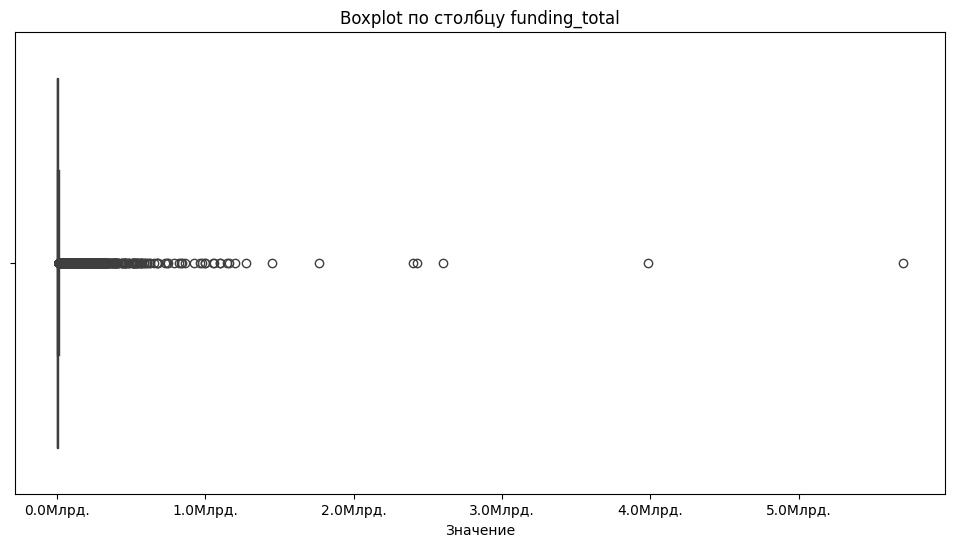

In [170]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='funding_total')

plt.title('Boxplot по столбцу funding_total')
plt.xlabel('Значение')

# Форматируем ось x для читаемости
formatter = FuncFormatter(lambda x, _: f'{x/1e9:.1f}Млрд.')  # Преобразуем в млрд (billions) с 1 знаком после запятой
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

**Вывод:**
- Данные сильно асимметричны и имеют длинный правый хвост;
- Большая часть значений сосредоточена около 0-5 млн, но есть отдельные очень большие суммы (до 5,7 млрд);
- Видно огромное количество выбросов, начинающихся примерно после 1,4 млрд;
- Средняя линия (медиана) расположена в нижней части "ящика", что подтверждает скошенность распределения.

Теперь взгялнем на график boxplot без выбросов, чтобы взглянуть непосредственно на сам ящик с усами.

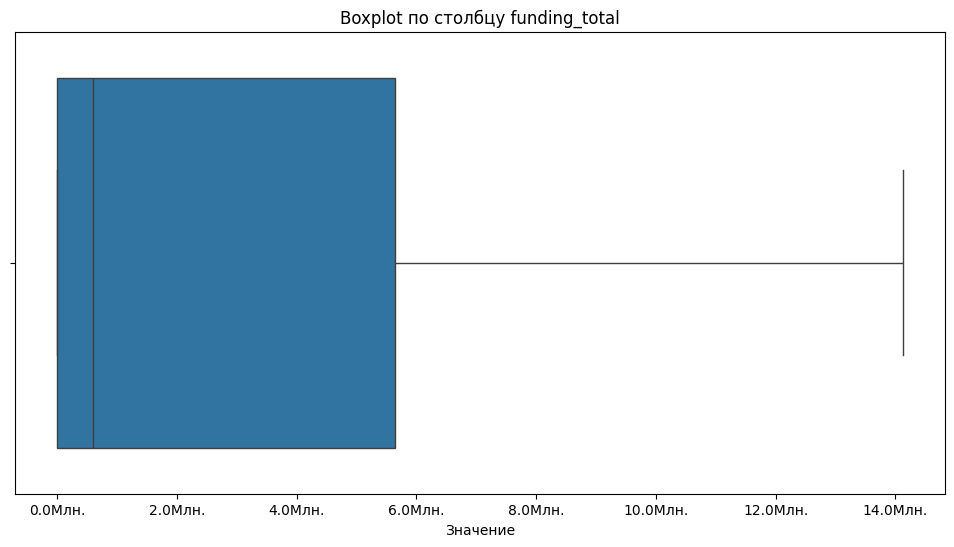

In [171]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='funding_total', showfliers=False)

plt.title('Boxplot по столбцу funding_total')
plt.xlabel('Значение')

# Форматируем ось x для читаемости
formatter = FuncFormatter(lambda x, _: f'{x/1e6:.1f}Млн.')  # Преобразуем в млрд (billions) с 1 знаком после запятой
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

**Вывод:**
- Исключение выбросов даёт более точное представление о "типичных" значениях;
- Основная масса значений не превышает 14 млн;
- Верхний "ус" графика доходит примерно до 14 млн, что можно считать границей типичных значений;
- Большая часть значений сконцентрирована в диапазоне 0-600 тыс., что подтверждает выводы из `.describe()`;
- Три четверти компаний (до 75% данных) получили не более 5,65 млн;
- Также чётко видно, что значительная часть значений сосредоточена около 0, подтверждая, что как минимум 25% данных — нули.

Теперь взглянем на гистограмму распределения с kde, чтобы лицезреть график плотности распределения.

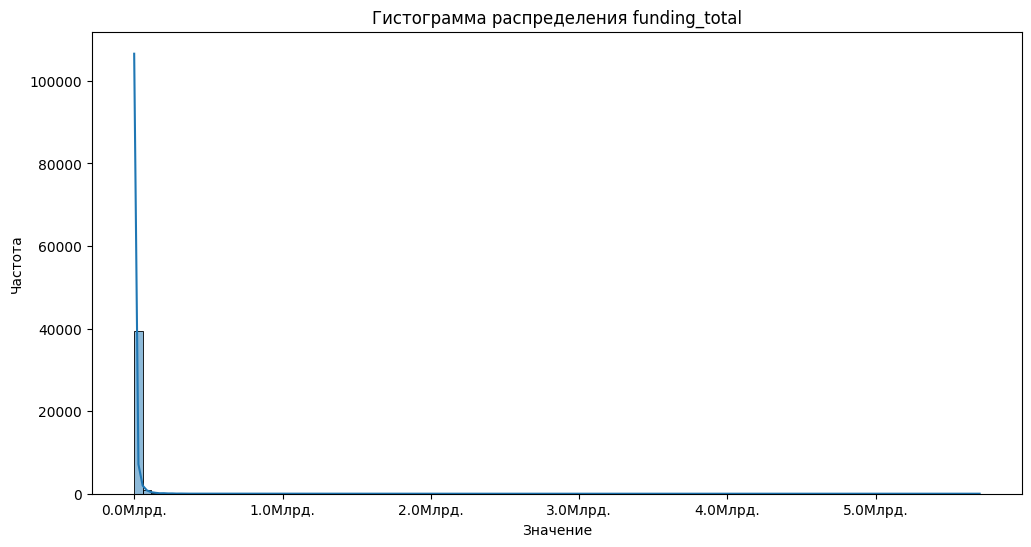

In [172]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='funding_total', bins=100, kde=True)

plt.title('Гистограмма распределения funding_total')
plt.xlabel('Значение')
plt.ylabel('Частота')

formatter = FuncFormatter(lambda x, _: f'{x/1e9:.1f}Млрд.')  # Преобразуем в млрд (billions) с 1 знаком после запятой
plt.gca().xaxis.set_major_formatter(formatter)

plt.show()

**Вывод:**
- Распределение имеет очень длинный хвост вправо, что свидетельствует о наличии редких, но очень больших значений;
- Большая часть значений равна 0, как мы выяснили ранее, это минимум 25% данных по столбцу `funding_total`;
- Большие значения встречаются очень редко, но сильно влияют на среднее;
- Небольшое количество компаний **получили гигантские суммы (до 5,7 млрд)**, создавая длинный хвост вправо.

Из-за большого количества нулевых значений наш график сильно искажается, так что для лучшего понимания взглянем на логарифмированный натуральным логарифмом по x + 1.

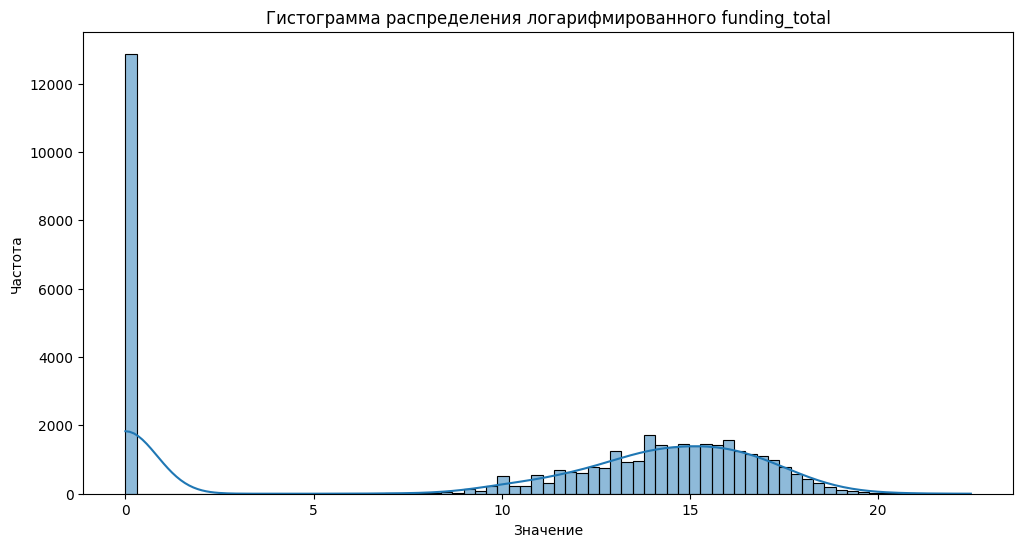

In [173]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x=np.log1p(df['funding_total']), bins=75, kde=True)

plt.title('Гистограмма распределения логарифмированного funding_total')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()

**Вывод:**
- Резкий пик около 0 указывает на значительное количество нулевых значений, что подтверждает, что многие компании не получали финансирование.
- После логарифмирования распределение остаётся асимметричным, но теперь правый хвост имеет форму, похожую на нормальное распределение.
- Основная часть значений (среди компаний, получивших финансирование) всё ещё распределена неравномерно и остаётся смещённой влево.
- Медианное и "типичное" финансирование среди получивших средства находится примерно в диапазоне 600 тыс. – 5,65 млн (на основе обратного преобразования из логарифма).
- Выбросы (очень крупные суммы) чётко отделяются справа, они образуют правый "хвост" распределения.

#### 4.2.3. Вычислим границы «типичных» значений с помощью IQR

In [174]:
Q1 = df['funding_total'].quantile(0.25)
Q3 = df['funding_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print("Нижняя граница (1.5 * IQR):", lower_bound)
print("Верхняя граница (1.5 * IQR):", upper_bound)

Нижняя граница (1.5 * IQR): 0
Верхняя граница (1.5 * IQR): 14126625.0


Потенциальным выбросами считаем считаем всё то, что лежит за этими границами.

In [175]:
outliers = df[(df['funding_total'] < lower_bound) | (df['funding_total'] > upper_bound)]
print("Количество потенциальных выбросов:", len(outliers))

Количество потенциальных выбросов: 5858


**Вывод:**

- Типичный диапазон финансирования по IQR: от 0 до 14,1 млн (исключая значения меньше нуля, которых нет и не может быть логически по столбцу `funding_total`).
- Выбросы: суммы выше 14,1 млн (по IQR), что приблизительно и было получено визуально (по boxplot).
- Обнаружено 5 858 выбросов (≈14,4% компаний).

#### 4.2.4. Промежуточный вывод

**Анализ описательной статистики (`.describe()`)**
- Количество наблюдений: 40 747 компаний;
- Среднее значение (`mean`): 10,1 млн, но оно сильно искажено выбросами и не является надёжным показателем;
- Стандартное отклонение (`std`): 56,5 млн, что подтверждает огромный разброс данных;
- Медиана (`50%` квантиль): 600 тыс. – это наиболее типичное значение финансирования;
- Первый квартиль (`25%` квантиль): 0 – как минимум 25% компаний вообще не получили финансирования;
- Третий квартиль (`75%` квантиль): 5,65 млн – три четверти компаний получили финансирование в пределах этой суммы;
- Максимальное значение (`max`): 5,7 млрд – это явный выброс.

**Выявление типичных и выбивающихся значений**
- *Типичные значения:*
  - Основное финансирование сосредоточено в пределах от 600 тыс. до 5,65 млн (межквартильный размах);
  - Для оценки типичного значения лучше ориентироваться на медиану (600 тыс.), так как среднее завышено выбросами.
<br>
- *Выбивающиеся значения (выбросы):*
  - Граница выбросов примерно на уровне 14 млн (по boxplot без выбросов);
  - Значения выше 14 млн встречаются крайне редко и могут считаться выбросами (это подтверждается и через IQR, где выбросы, если значения выше 14,1 млн);
  - Максимальное значение 5,7 млрд — это единичные случаи крупных сделок, не характерные для большинства компаний.

**Применимость стандартных методов для нахождения типичных значений**
- Среднее значение непригодно, так как его сильно искажают редкие крупные суммы (можно корректно использовать в качестве лишь с нормальным распределением или приближенным к нему);
- Медиана (600 тыс.) — надёжный показатель "типичного" финансирования (медианы зачастую всегда надежна в качестве типичного значения);
- Логарифмирование помогает лучше анализировать данные, но не делает их полностью нормальными;
- Границы выбросов можно определять по IQR (межквартильному размаху) и boxplot (≈14 млн).

[Вернуться к содержанию](#Содержание)

<a class="anchor" id="Куплены-забесплатно"></a>

---

### 4.3. Куплены забесплатно?

#### 4.3.1. Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования

In [176]:
price_df = acquisition.copy()

In [177]:
price_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


Отсутствие пропусков позволяет нам в полном объёме спокойно анализировать данный вопрос.

In [178]:
print("Количество пропусков в абсолютных и относительных значениях:")
display(pd.DataFrame({
    'Total NaN': price_df.isna().sum(),
    'Percentage NaN': price_df.isna().mean() * 100
}).style.background_gradient('coolwarm').format({'Percentage NaN': '{:.2f}%'}))

Количество пропусков в абсолютных и относительных значениях:


,Total NaN,Percentage NaN
id,0,0.00%
acquiring_company_id,0,0.00%
acquired_company_id,0,0.00%
term_code,7576,80.54%
price_amount,0,0.00%
acquired_at,29,0.31%


Для данного анализа отсюда нас интересуют столбцы `acquired_company_id` и `price_amount`, через первый мы будет объединять, через второй ставить условие для анализа.

In [179]:
df_merged = df.merge(price_df, left_on = 'company_id', right_on = 'acquired_company_id', how = 'inner')

Удаляем лишний столбец `id` из объединённого датасета.

In [180]:
df_merged.drop(columns=['id'], inplace=True)

Применяем необходимые нам условия, создавая срез для анализа.

In [181]:
df_for_analysis = df_merged[
    (df_merged['price_amount'].isin([0, 1])) & 
    (df_merged['funding_total'] > 0)
]

In [182]:
df_for_analysis = df_for_analysis.copy()

In [183]:
df_for_analysis.shape[0]

1618

Заметим, что сделок с покупкой за один доллар просто-напросто нет. Присутствуют только покупки за 0 долларов с медианным значением по `funding_total` в 6 млн.

In [184]:
df_for_analysis.groupby('price_amount').agg({'funding_total': ['mean', 'median']})

funding_total           
                      mean     median
price_amount                         
0             1.815296e+07  6000000.0

Теперь взглянем на то, какую часть составляют такие сделки.

In [185]:
total_deals = price_df.shape[0]
free_deals = df_for_analysis.shape[0]
percentage_free_deals = (free_deals / total_deals) * 100

print(f"Всего сделок: {total_deals}")
print(f"Сделок за 0 или 1 доллар с ненулевым финансированием: {free_deals}")
print(f"Доля таких сделок: {percentage_free_deals:.2f}%")

Всего сделок: 9407
Сделок за 0 или 1 доллар с ненулевым финансированием: 1618
Доля таких сделок: 17.20%


Можно увидеть, что из общего числа в 9407 сделок 1618 за 0 или 1 доллар с ненулевым финансированием - это составляет достаточно немалые 17.2%.

Далее взглянем на распределение таких сделок по годам.

In [186]:
df_for_analysis['acquired_at'] = pd.to_datetime(df_for_analysis['acquired_at'])
df_for_analysis['year'] = df_for_analysis['acquired_at'].dt.year

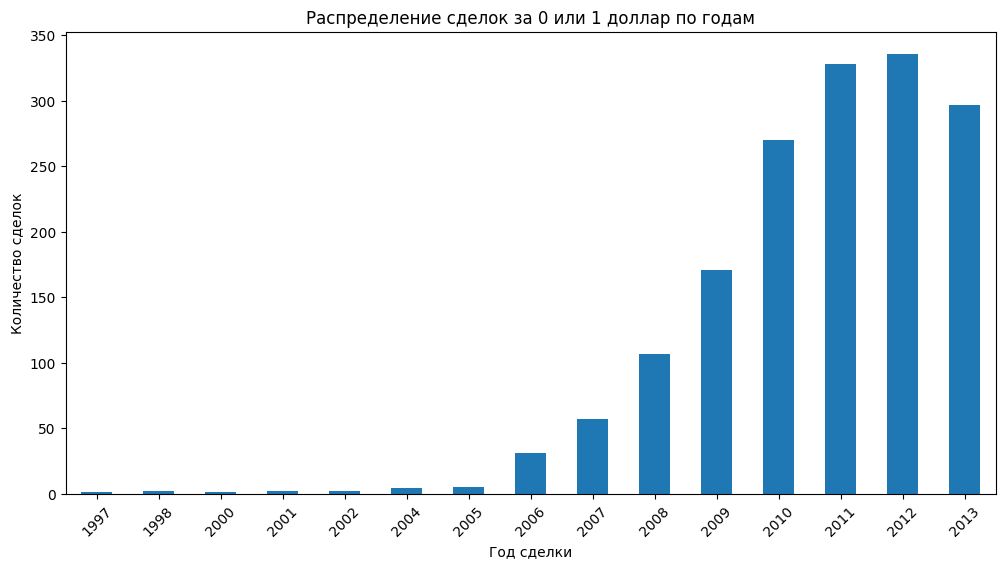

In [187]:
plt.figure(figsize=(12, 6))
ax = df_for_analysis['year'].value_counts().sort_index().plot(kind='bar')

plt.xlabel("Год сделки")
plt.ylabel("Количество сделок")
plt.title("Распределение сделок за 0 или 1 доллар по годам")

# Убираем десятичные знаки на оси X
ax.set_xticklabels(ax.get_xticks(), rotation=45, fontsize=10)  # Угол наклона для удобочитаемости
ax.set_xticks(range(len(ax.get_xticks())))  # Фиксируем количество меток
ax.set_xticklabels([int(label) for label in df_for_analysis['year'].value_counts().sort_index().index])

plt.show()

**Вывод:**
- Количество таких сделок увеличилось в последние годы;
- При этом нам сложно сделать конкретный вывод, ибо, возможно, до увеличения количества данные просто плохо заполнялись, или же это просто особенность непосредственно наших данных;
- Топ-5 по таким сделкам можно выделить: 2012, 2011, 2013, 2010 и 2009;
- Постепенное возрастание начинается с 2004 года, оно растёт вплоть до его пика в 2012, а в 2013 году немного падает - для более конкретных выводов требуются дополнительные исследования.

In [188]:
funds_for_free_top_10 = df_for_analysis['acquiring_company_id'].value_counts().reset_index().sort_values(by=['count'], ascending=False).head(10)

In [189]:
funds_for_free_top_10 = funds_for_free_top_10.merge(fund, left_on='acquiring_company_id', right_on='id', how='left')

In [190]:
funds_for_free_top_10 = funds_for_free_top_10.drop(columns=['id'])
funds_for_free_top_10['acquiring_company_id'] = funds_for_free_top_10['acquiring_company_id'].astype(int)

**Топ-10 фондов с операциями по приобретению компаний бесплатно**

In [191]:
funds_for_free_top_10

,acquiring_company_id,count,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,59,28,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,3246,26,atp capital,NaT,atpcap.com,NaN,sgp,2.0,1.0,0.0
2,2680,21,pontifax,2004-01-01,NaN,NaN,isr,17.0,12.0,0.0
3,1242,18,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,29,15,first round capital,2004-11-01,firstround.com,firstround,usa,361.0,211.0,0.0
5,2602,14,tullis health investors,1986-01-01,tullisfunds.com,NaN,usa,9.0,6.0,0.0
6,28,14,village ventures,1999-01-01,villageventures.com,villageventures,usa,68.0,41.0,0.0
7,11391,13,south shore venture enterprises,NaT,southshoreventure.com,NaN,usa,0.0,0.0,0.0
8,966,10,amadeus capital partners,1997-01-01,amadeuscapital.com,amadeuscapital,gbr,72.0,42.0,0.0
9,1972,9,k group,1980-01-01,kgroupcompanies.com,kgroupcompanies,usa,1.0,1.0,0.0


**Вывод:**
- В данном топе можно заметить, что существуют конкретные фонды, которые совершают множество таких сделок, однако сложно сказать ошибка ли это в данных или особенность непосредственно сделок;
- Также можно заметить, что большинство таких компаний находятся в США, какие-то в Сингапуре, Израиле или в Великобритании, но в топ-10 случаи единичные.

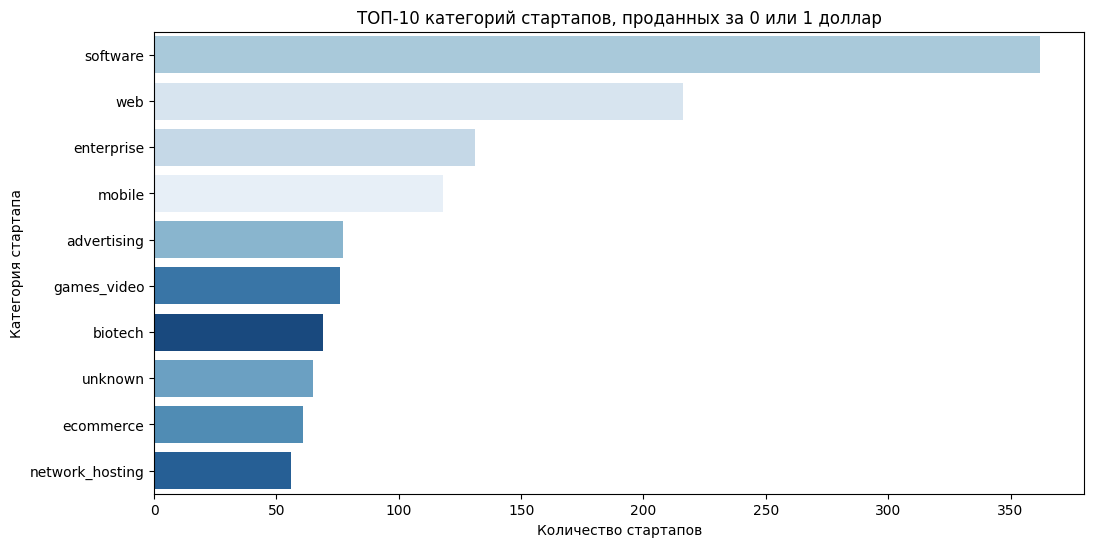

In [192]:
plt.figure(figsize=(12, 6))

# Выбираем ТОП-10 категорий
top_categories = df_for_analysis['category_code'].value_counts().head(10).index

# Фильтруем данные только по этим категориям
df_filtered = df_for_analysis[df_for_analysis['category_code'].isin(top_categories)]

# Строим countplot без предупреждений
sns.countplot(y=df_filtered['category_code'], order=top_categories, hue=df_filtered['category_code'], palette="Blues", legend=False)

# Настройка подписей
plt.xlabel("Количество стартапов")
plt.ylabel("Категория стартапа")
plt.title("ТОП-10 категорий стартапов, проданных за 0 или 1 доллар")

plt.show()

**Вывод:**

- Наиболее часто бесплатно продаваемые стартапы относятся к сфере IT: software, web, enterprise и mobile. Высокая конкуренция и сложности монетизации могут быть ключевыми факторами;
- Advertising и games/video также входят в топ, но их меньше. В этих сферах сделки могут происходить из-за консолидации рынка;
- Biotech и e-commerce тоже попали в топ. Биотех может сталкиваться с высокой стоимостью исследований, а e-commerce страдает от низкой маржи и высокой конкуренции;
- Категория unknown значительна, что указывает на неполные данные, и это те стартапы, категория которых неизвестна;
- Общий тренд: технологические стартапы чаще всего продаются за 0-1 доллар, так как быстро меняются рынки, технологии и бизнес-модели.


[Вернуться к содержанию](#Содержание)

#### 4.3.2. Аналитически расчитаем верхнюю и нижнюю границу выбросов для столбца funding_total

In [193]:
Q1 = df_for_analysis['funding_total'].quantile(0.25)
Q3 = df_for_analysis['funding_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

print("Нижняя граница (1.5 * IQR):", lower_bound)
print("Верхняя граница (1.5 * IQR):", upper_bound)

Нижняя граница (1.5 * IQR): 0
Верхняя граница (1.5 * IQR): 35750000.0


In [194]:
lower_percentile = df_for_analysis['funding_total'].rank(pct=True).loc[df_for_analysis['funding_total'] <= lower_bound].max()
upper_percentile = df_for_analysis['funding_total'].rank(pct=True).loc[df_for_analysis['funding_total'] >= upper_bound].min()

print("Нижняя граница соответствует процентилю:", lower_percentile)
print("Верхняя граница соответствует процентилю:", upper_percentile)

Нижняя граница соответствует процентилю: nan
Верхняя граница соответствует процентилю: 0.9097651421508035


In [195]:
num_outliers = df_for_analysis[(df_for_analysis['funding_total'] > upper_bound)].shape[0]
percent_outliers = (num_outliers / df_for_analysis.shape[0]) * 100

print(f"Количество выбросов: {num_outliers}")
print(f"Процент выбросов: {percent_outliers:.2f}%")

Количество выбросов: 147
Процент выбросов: 9.09%


**Вывод:**
- На основе анализа столбца `funding_total` методами квартильного размаха (IQR) были определены границы выбросов. Нижняя граница составляет 0, что означает отсутствие отрицательных значений финансирования, а верхняя граница установлена на уровне 3 575 000 долларов. Это значит, что значения выше этого порога считаются выбросами.
- Анализ процентилей показал, что верхняя граница соответствует примерно 90.98 процентилю, что указывает на то, что около 9.09% данных (147 значений) выходят за пределы этой границы и могут рассматриваться как выбросы.
- Выбросы в данном случае могут представлять либо редкие, но значительные суммы финансирования, либо аномальные данные, требующие дополнительной проверки.


[Вернуться к содержанию](#Содержание)

<a class="anchor" id="Цены-стартапов-по-категориям"></a>

---
### 4.4. Цены стартапов по категориям

Вернёмся к датасету `df_merged`.

In [196]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9390 entries, 0 to 9389
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            9390 non-null   int64         
 1   name                  9390 non-null   object        
 2   category_code         9390 non-null   object        
 3   status                9390 non-null   object        
 4   founded_at            4805 non-null   datetime64[ns]
 5   closed_at             35 non-null     datetime64[ns]
 6   domain                9390 non-null   object        
 7   network_username      9390 non-null   object        
 8   country_code          9390 non-null   object        
 9   investment_rounds     9390 non-null   int64         
 10  funding_rounds        9390 non-null   int64         
 11  funding_total         9390 non-null   float64       
 12  milestones            9390 non-null   int64         
 13  acquiring_company_

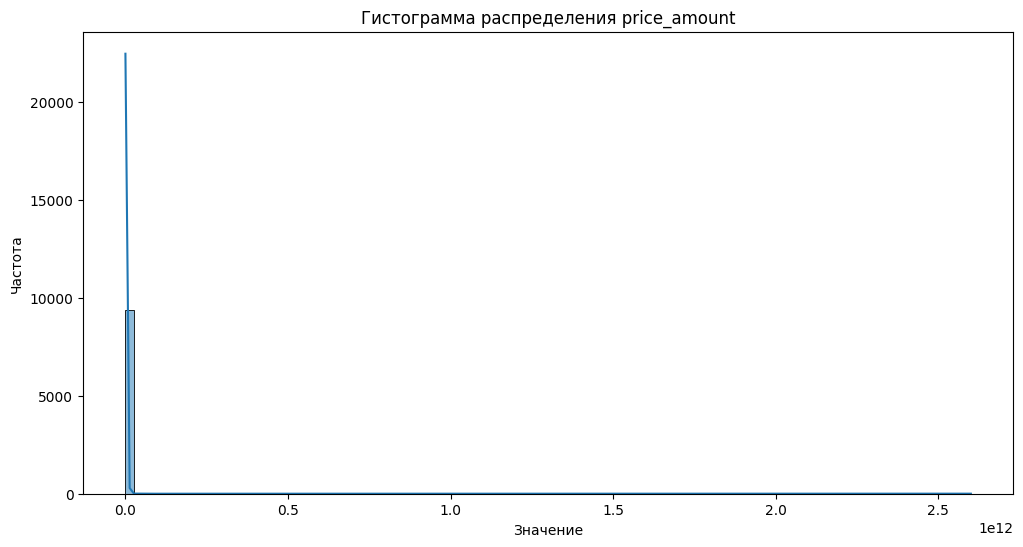

In [197]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df_merged, x='price_amount', bins=100, kde=True)

plt.title('Гистограмма распределения price_amount')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()

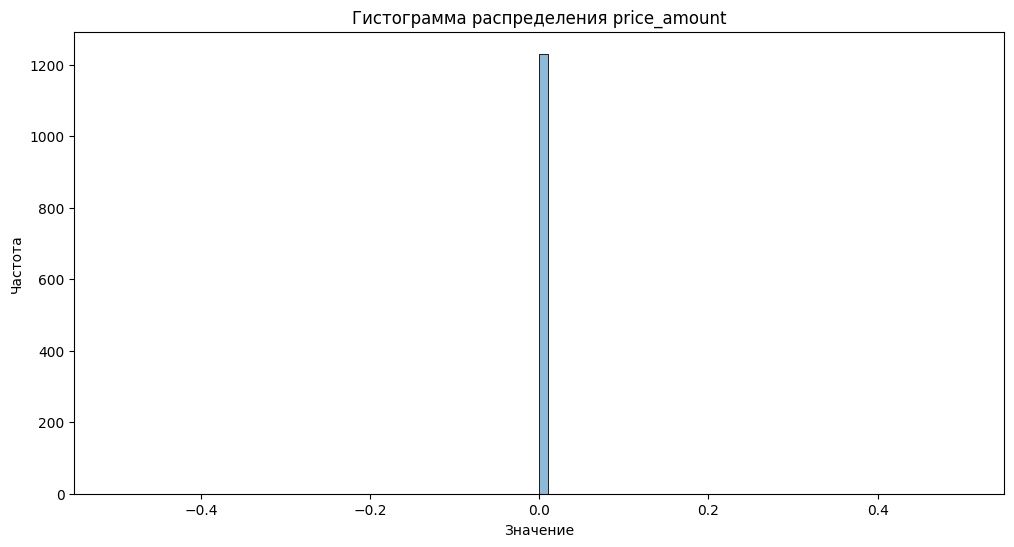

In [198]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df_filtered, x='price_amount', bins=100, kde=True)

plt.title('Гистограмма распределения price_amount')
plt.xlabel('Значение')
plt.ylabel('Частота')

plt.show()

Если в категории слишком мало данных, статистика (медиана, IQR) становится ненадёжной. При 10 наблюдениях одна экстремальная сделка может сильно сместить результаты. При 2000 общих наблюдениях лучше увеличить порог до **20-30 записей**, чтобы избежать случайных выбросов. Выберем порог в **30 записей**.

In [199]:
category_counts = df_merged['category_code'].value_counts()
valid_categories = category_counts[category_counts >= 30].index
df_filtered = df_merged[df_merged['category_code'].isin(valid_categories)]

In [200]:
category_stats = (df_filtered.groupby('category_code')['price_amount'].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])).reset_index()
category_stats.columns = ['category_code', 'median_price', 'iqr_price']

In [201]:
category_stats.columns = ['category_code', 'median_price', 'iqr_price']

In [202]:
category_stats = (df_filtered.groupby('category_code')['price_amount'].agg(['median', lambda x: x.quantile(0.75) - x.quantile(0.25)])).reset_index()
category_stats.columns = ['category_code', 'median_price', 'iqr_price']

In [203]:
top_categories_by_price = category_stats.sort_values(by='median_price', ascending=False).head(10)
top_categories_by_variability = category_stats.sort_values(by='iqr_price', ascending=False).head(10)

In [204]:
top_categories_by_price

,category_code,median_price,iqr_price
2,biotech,13200000.0,250000000.0
8,finance,600000.0,170750000.0
0,advertising,0.0,3000000.0
3,cleantech,0.0,69000000.0
1,analytics,0.0,0.0
4,consulting,0.0,0.0
5,ecommerce,0.0,0.0
6,education,0.0,0.0
7,enterprise,0.0,5700000.0
9,games_video,0.0,13250.0


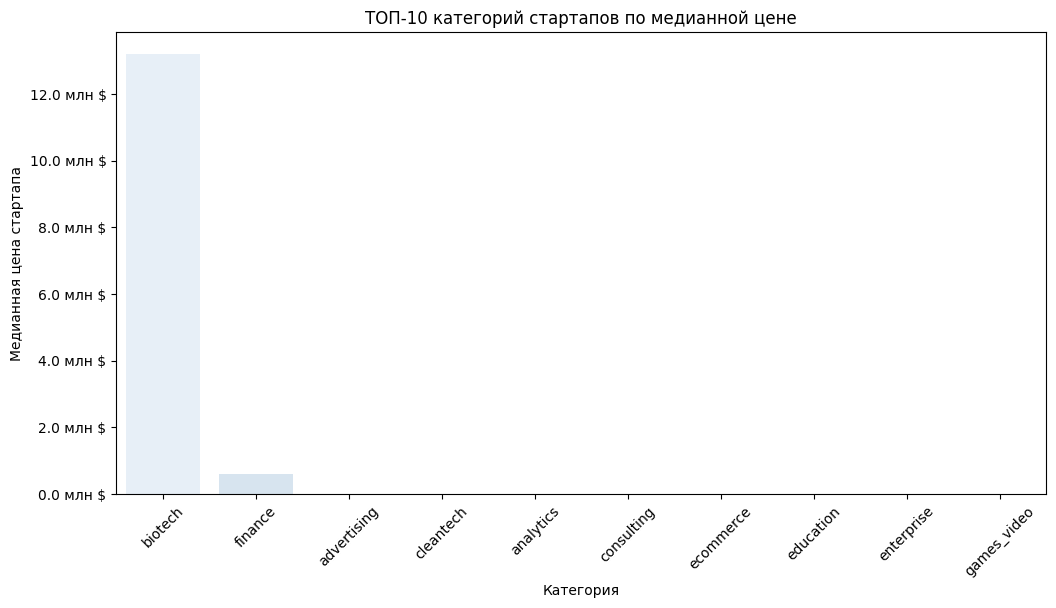

In [205]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_categories_by_price['category_code'], 
                 y=top_categories_by_price['median_price'], 
                 hue=top_categories_by_price['category_code'], 
                 palette="Blues")

def millions_formatter(x, pos):
    return f'{x/1_000_000:.1f} млн $'

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Применяем к `ax`

plt.xticks(rotation=45)
ax.set_xlabel("Категория")
ax.set_ylabel("Медианная цена стартапа")
ax.set_title("ТОП-10 категорий стартапов по медианной цене")

plt.show()

**Вывод:**
- Категория `biotech` имеет самую высокую медианную цену стартапов – 13,2 млн, что значительно превышает остальные категории. Финансовые стартапы ("finance") занимают второе место, но с гораздо меньшей медианной ценой – 600 тыс.. Остальные категории, включая `advertising`, `network_hosting`, `security`, `public relations`, имеют медианную цену 0, что может свидетельствовать о небольшом количестве данных или высокой вариативности.  
- Разброс цен (IQR) в категории `finance` (170,75 млн $) очень велик, что говорит о высокой волатильности в оценке стартапов. В `biotech` разброс также значителен (250 млн), что подтверждает, что эта категория может включать как небольшие проекты, так и крупные инвестиции.
- Так же, конечно, результат связан и с теми условиями, которые использовались для среза данных.

In [206]:
top_categories_by_variability

,category_code,median_price,iqr_price
2,biotech,13200000.0,250000000.0
8,finance,600000.0,170750000.0
17,semiconductor,0.0,75000000.0
3,cleantech,0.0,69000000.0
10,hardware,0.0,30000000.0
12,network_hosting,0.0,25000000.0
14,public_relations,0.0,17250000.0
16,security,0.0,9200000.0
7,enterprise,0.0,5700000.0
18,software,0.0,5185000.0


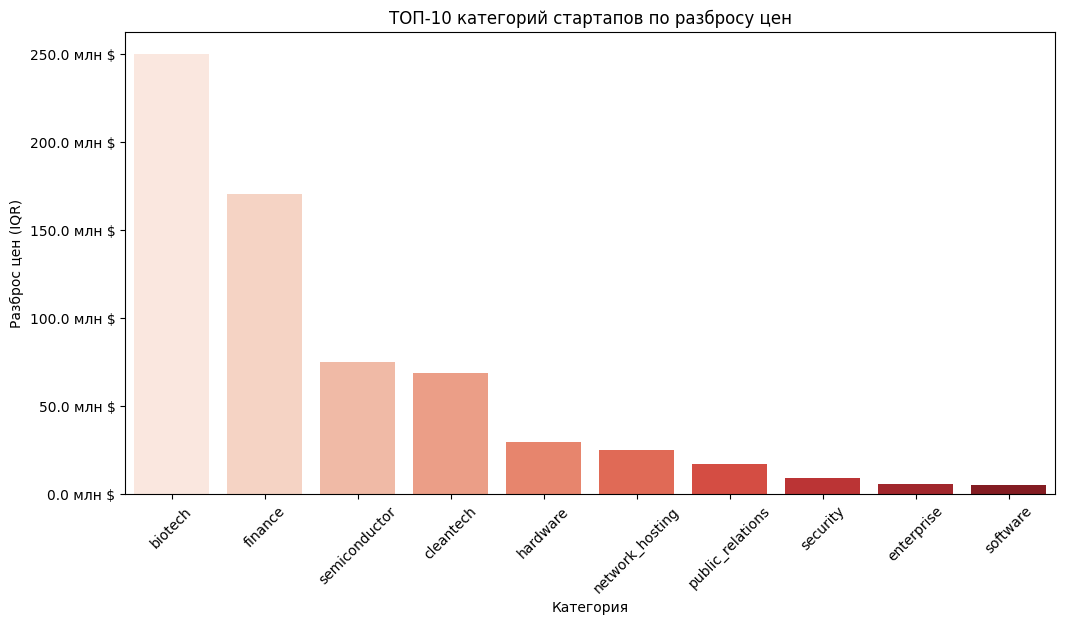

In [207]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_categories_by_variability['category_code'], 
                 y=top_categories_by_variability['iqr_price'], 
                 hue=top_categories_by_variability['category_code'], 
                 palette="Reds")

# Функция форматирования оси Y в миллионах долларов
def millions_formatter(x, pos):
    return f'{x/1_000_000:.1f} млн $'

# Применяем форматирование
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xticks(rotation=45)
ax.set_xlabel("Категория")
ax.set_ylabel("Разброс цен (IQR)")
ax.set_title("ТОП-10 категорий стартапов по разбросу цен")

plt.show()

**Вывод:**
- Категория `biotech` демонстрирует наибольший разброс цен (IQR) среди стартапов, составляя 250 млн, что указывает на значительную вариативность оценок стартапов в этой сфере.  
- Финансовые стартапы также обладают высоким разбросом (170.75 млн), что может свидетельствовать о разных моделях финансирования и масштабах проектов в отрасли.  
- Сегменты `semiconductor` (75 млн) и `cleantech` (69 млн) имеют заметный разброс, что может быть связано с различиями в технологиях и стадиях развития стартапов.  
- Категории `hardware`, `network hosting` и `public relations` имеют меньший разброс цен, но всё же достаточно высокий, достигая 30 млн, 25 млн и 17.25 млн соответственно.  
- Самый низкий уровень вариативности у стартапов в сфере `software` (5.18 млн), `enterprise` (5.7 млн) и `ecurity` (9.2 млн), что может говорить о большей предсказуемости их оценки на рынке.  
- В целом, биотехнологии и финансы остаются самыми неоднородными по стоимости стартапов, тогда как софтверные компании и предприятия безопасности имеют более стабильные оценки.


*Почему был вабран ТОП-10?*
- ТОП-5 может быть слишком узким и не отражать всю картину.
- ТОП-10 позволяет включить более разнообразные категории, а не только несколько лидеров.
- ТОП-20 уже перегружает анализ и делает его сложнее для интерпретации.
- Именно поэтому я посчитал, что ТОП-10 — это оптимальный баланс между детализацией и удобочитаемостью.


[Вернуться к содержанию](#Содержание)

<a class="anchor" id="Сколько-раундов-продержится-стартап-перед-покупкой"></a>

---
### 4.5. Сколько раундов продержится стартап перед покупкой

Используем так же `df_merged`, ибо нам важно знать о том, что компания куплена, а в нем оставлены только те компании, у кторых есть информация об их покупке.

In [208]:
# Описательная статистика для количества раундов
df_merged['funding_rounds'].describe()

count    9390.000000
mean        0.527689
std         1.085262
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        12.000000
Name: funding_rounds, dtype: float64

In [209]:
funding_by_status = df_merged.groupby('status')['funding_rounds'].median().reset_index()
funding_by_status.columns = ['status', 'median_funding_rounds']

In [210]:
funding_by_status

,status,median_funding_rounds
0,acquired,0.0


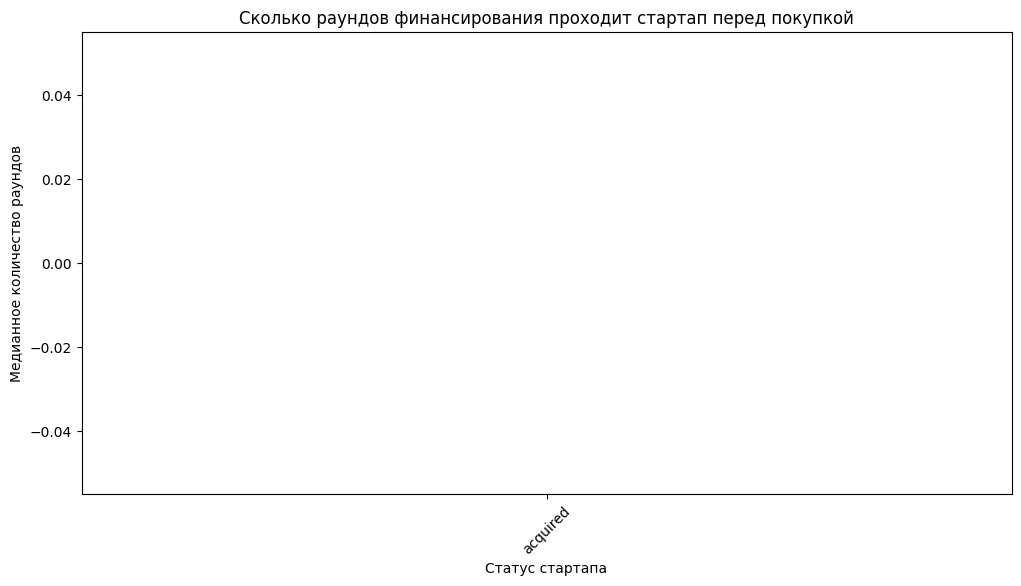

In [211]:
plt.figure(figsize=(12, 6))
sns.barplot(x=funding_by_status['status'], y=funding_by_status['median_funding_rounds'], hue=funding_by_status['status'], palette="viridis")
plt.xlabel("Статус стартапа")
plt.ylabel("Медианное количество раундов")
plt.title("Сколько раундов финансирования проходит стартап перед покупкой")
plt.xticks(rotation=45)
plt.show()

**Вывод:**
- Для уже приобретенных стартапов в данных наиболее типичным значение является 0 - это может свидетельствовать о том, что в имеющейся выборке большинство приобретенных стартапов либо не проходили формальные раунды финансирования, либо данные о них отсутствуют.  
- Визуализация подтверждает этот вывод: барплот пуст, так как все значения находятся на нуле. 

Рассмотрим также типичное количество раундов финансирования для всех компаний, которые удовлетворяют условию, а не только тех, которые были уже приобретены и для которых у нас присутствуют данные о приобретении.

In [212]:
# Описательная статистика для количества раундов
df['funding_rounds'].describe()

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

In [213]:
funding_by_status_full = df.groupby('status')['funding_rounds'].median().reset_index()
funding_by_status_full.columns = ['status', 'median_funding_rounds']

In [214]:
funding_by_status_full

,status,median_funding_rounds
0,acquired,0.0
1,closed,1.0
2,ipo,1.0
3,operating,1.0


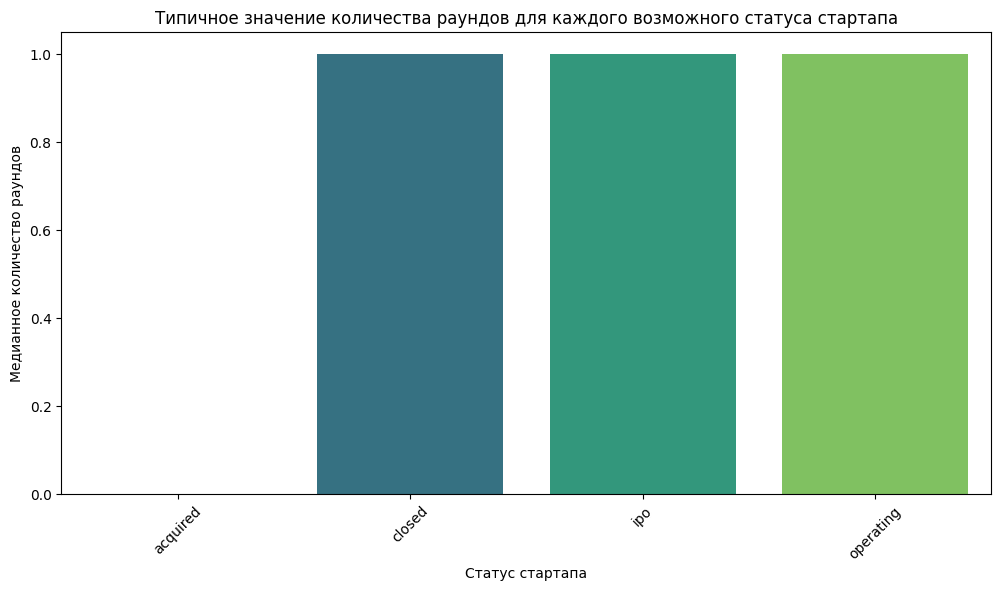

In [215]:
plt.figure(figsize=(12, 6))
sns.barplot(x=funding_by_status_full['status'], y=funding_by_status_full['median_funding_rounds'], hue=funding_by_status_full['status'], palette="viridis")
plt.xlabel("Статус стартапа")
plt.ylabel("Медианное количество раундов")
plt.title("Типичное значение количества раундов для каждого возможного статуса стартапа")
plt.xticks(rotation=45)
plt.show()

**Вывод:**
- Данные показывают, что медианное количество раундов финансирования для стартапов со статусами `closed`, `ipo` и `operating` равно 1.  
- Для стартапов со статусом `acquired` медианное количество раундов составляет 0, что подтверждает предыдущий вывод о том, что такие компании либо не привлекали внешнее финансирование, либо информация о них отсутствует.  
- Это может свидетельствовать о том, что успешные стартапы (достигшие IPO или продолжающие работать) имеют хотя бы один раунд финансирования.  
- При этом компании, которые закрылись, также в большинстве случаев имели хотя бы один раунд, но он не привел к устойчивому развитию.

[Вернуться к содержанию](#Содержание)

<a class="anchor" id="Итоговый-вывод"></a>

---
## 5. Итоговый вывод и рекомендации

**Итоговый отчет по анализу венчурных инвестиций**
1. **Ознакомление с данными: загрузка и первичная обработка**<br>

<pre>1.1. Были импортированы необходимые библиотеки для анализа данных (pandas, numpy, matplotlib, seaborn).<br>
1.2. Были загружены датасеты, включающие информацию о раундах финансирования, людях, образовании, фондах и компаниях.<br>
1.3. Проведена проверка и исправление названий столбцов, привели их к единому стилю.<br>
1.4. Получена общая информация о датасетах, выявили потенциальные проблемы (пропуски, некорректные значения, дубликаты).<br>
1.5. Приведены данные к корректным типам (datetime для дат, int для некоторых финансовых показателей (было сделано после заполнения пропусков), category для категориальных данных (тоже непосредственно в заполнении пропусков)).<br>
1.6. Проанализированы пропуски, отметили, что в датасете company_and_rounds.csv значительное количество данных отсутствует, особенно в информации о раундах финансирования.</pre>

---

2. **Предобработка данных и предварительное исследование**<br>

<pre>2.1. Проведен анализ раундов финансирования по годам, без объединения с другими таблицами. Построили сводную таблицу с общим количеством раундов и средним объемом финансирования за год. Выявили рост инвестиций после 2000 года и снижение после 2010-го.<br>
2.2. Исследованы данные о людях и их образовании. Установили, что в малых компаниях меньше информации о сотрудниках, а в крупных данные более полные. Анализ возможного объединения с degrees.csv показал, что присоединение не даст значительного прироста информации.<br>
2.3. Проведен анализ возможности объединения датасетов по network_username. Обнаружили, что значения не уникальны и объединение по этому полю может привести к дубликатам и раздуванию таблицы. Решено использовать company_id как более надежный ключ.<br>
2.4. Проведена глубокую работу над company_and_rounds.csv, выявили причины возникновения пропусков. Привели данные к удобному виду для анализа по компаниям и раундам, то есть разделив на 2 датасета companies и rounds, где первый датасет имеет уникальные значения по company_id, а во втором уникальные по столбцу funding_round_id.</pre>

---

3. **Исследовательский анализ объединенных таблиц**<br>

<pre>3.1. Объединены данные, взяв за основу company_and_rounds.csv и выбрав только компании с инвестициями и раундами финансирования. В результирующем датасете — около 40 тысяч компаний.<br>
3.2. Проанализированы выбросы по общему финансированию компаний. Использованы методы статистики и графические способы. В конечном счете, обнаружено, что финансирование компаний распределено неравномерно, с сильными отклонениями.<br>
3.3. Исследованы случаи, когда компании были куплены за $0 или $1, но ранее получали значительные инвестиции. Выяснили, что это либо ошибочные данные, либо случаи приобретения с долгами или внутренние сделки.<br>
3.4. Классифицированы стартапы по ценам. Выделены топ-10 категорий с наибольшими медианными ценами и наибольшим разбросом. Лидерами по медианной цене оказались biotech и finance.<br>
3.5. Проанализировано, сколько раундов проходит стартап перед покупкой. Данные показали, что приобретенные компании не всегда имеют большое количество раундов - медианное количество раундов = 0, что указывает на разные стратегии выхода. Также проведен анализ по всем статусам, где видно, что если стартапы продаются, то зачастую на раннем этапе, в других случая, получая финансирования, на первом раунде они выходят на IPO, терпят крах или продолжают свою деятельность.</pre>

---

**Важные выводы**
- Рынок венчурных инвестиций находился на подъеме, особенно в 2000-х и начале 2010-х годов. Однако после 2010 года рост количества раундов замедлился.
  
- Количество стартапов увеличивалось, что подтверждается ростом числа раундов финансирования.
  
- Средний объем инвестиций на раунд колебался, не показывая четкого тренда на увеличение или снижение, что указывает на стабильность рынка.
  
- Общий объем привлеченных инвестиций рос экспоненциально, подтверждая, что индустрия стартапов активно развивалась.

- Сектора с наибольшими инвестициями — биотехнологии и финансы, тогда как в других отраслях, таких как software или security, финансирование было менее значительным.

- Объединение данных по network_username неэффективно, так как значения не уникальны. Предпочтительнее использовать company_id. Однако, в специфических целях анализа это возможно, а так же как одна из итераций заполнения или другого действия.

- Компании, купленные за 0$ или 1$, требуют дополнительного анализа, так как возможны ошибки в данных или специфические условия сделки. В срезе же, например, вообще отсутствуют данные о покупках за 1$.


<br>

**Общий итог:** рынок венчурных инвестиций был в фазе активного роста, но замедлился после 2010 года. Основной драйвер роста — увеличение количества стартапов, а не рост среднего размера инвестиций.



[Вернуться к содержанию](#Содержание)